<h1><b>Preparation</b></h1>

In [0]:
%fs ls /FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project

path,name,size,modificationTime
dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Advanced.csv,Advanced.csv,4527798,1722005111000
dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/All_Star_Selections.csv,All_Star_Selections.csv,67946,1722005105000
dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/End_of_Season_Teams.csv,End_of_Season_Teams.csv,130844,1722005106000
dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/End_of_Season_Teams__Voting_.csv,End_of_Season_Teams__Voting_.csv,340892,1722005105000
dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Opponent_Stats_Per_100_Poss.csv,Opponent_Stats_Per_100_Poss.csv,206522,1722005107000
dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Opponent_Stats_Per_Game.csv,Opponent_Stats_Per_Game.csv,259732,1722005107000
dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Opponent_Totals.csv,Opponent_Totals.csv,263022,1722005107000
dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Per_100_Poss.csv,Per_100_Poss.csv,4028957,1722005111000
dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Per_36_Minutes.csv,Per_36_Minutes.csv,4561571,1722005106000
dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Player_Award_Shares.csv,Player_Award_Shares.csv,213623,1722005102000


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
from matplotlib.ticker import FuncFormatter

from pyspark.sql import SparkSession

# Library used to set up data type format
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType

# Import sql function
from pyspark.sql.functions import col, when, sum, avg, row_number, round, rank, count, lit

from pyspark.sql.window import Window

In [0]:
# Create session
spark = SparkSession.builder.appName("NBA Spark Databricks Project").getOrCreate()

spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

<h1><b>Load Data</b></h1>

In [0]:
# Define data schema (best practices)
advanced_schema = StructType([
    StructField("seas_id", IntegerType(), True),
    StructField("season", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player", StringType(), True),
    StructField("birth_year", IntegerType(), True),
    StructField("pos", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("experience", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("tm", StringType(), True),
    StructField("g", IntegerType(), True),
    StructField("mp", IntegerType(), True),
    StructField("per", DecimalType(5, 3), True),
    StructField("ts_percent", DecimalType(5, 3), True),
    StructField("x3p_ar", DecimalType(5, 3), True),
    StructField("f_tr", DecimalType(5, 3), True),
    StructField("orb_percent", DecimalType(5, 3), True),
    StructField("drb_percent", DecimalType(5, 3), True),
    StructField("trb_percent", DecimalType(5, 3), True),
    StructField("ast_percent", DecimalType(5, 3), True),
    StructField("stl_percent", DecimalType(5, 3), True),
    StructField("blk_percent", DecimalType(5, 3), True),
    StructField("tov_percent", DecimalType(5, 3), True),
    StructField("usg_percent", DecimalType(5, 3), True),
    StructField("ows", DecimalType(5, 3), True),
    StructField("dws", DecimalType(5, 3), True),
    StructField("ws", DecimalType(5, 3), True),
    StructField("ws_48", DecimalType(5, 3), True),
    StructField("obpm", DecimalType(5, 3), True),
    StructField("dbpm", DecimalType(5, 3), True),
    StructField("bpm", DecimalType(5, 3), True),
    StructField("vorp", DecimalType(5, 3), True)
])

# Read CSV file
advanced_df = spark.read.schema(advanced_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Advanced.csv")

# Show data
advanced_df.show(2)


+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+------+----------+------+-----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----+-----+-----+-----+------+------+------+------+
|seas_id|season|player_id|     player|birth_year|pos|age|experience| lg| tm|  g| mp|   per|ts_percent|x3p_ar| f_tr|orb_percent|drb_percent|trb_percent|ast_percent|stl_percent|blk_percent|tov_percent|usg_percent|  ows|  dws|   ws|ws_48|  obpm|  dbpm|   bpm|  vorp|
+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+------+----------+------+-----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----+-----+-----+-----+------+------+------+------+
|  31136|  2024|     5025| A.J. Green|      null| SG| 24|         2|NBA|MIL| 56|614|10.500|     0.617| 0.862|0.097|      1.600|      9.600|      5.700|      6.400|      0.700|      0.600|      5.500|     15.2

In [0]:
all_star_selections_schema = StructType([
    StructField("player", StringType(), True),
    StructField("team", StringType(), True),
    StructField("lg", StringType(), True),
    StructField("season", IntegerType(), True),
    StructField("replaced", BooleanType(), True)
])

# Read CSV file
all_star_selections_df = spark.read.schema(all_star_selections_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/All_Star_Selections.csv")

# Show data
all_star_selections_df.show(2)

+--------------------+----+---+------+--------+
|              player|team| lg|season|replaced|
+--------------------+----+---+------+--------+
|         Bam Adebayo|East|NBA|  2024|   false|
|Giannis Antetokou...|East|NBA|  2024|   false|
+--------------------+----+---+------+--------+
only showing top 2 rows



In [0]:
end_of_season_teams_voting_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("type", StringType(), True),
    StructField("number_tm", StringType(), True),
    StructField("position", StringType(), True),
    StructField("player", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("tm", StringType(), True),
    StructField("pts_won", IntegerType(), True),
    StructField("pts_max", IntegerType(), True),
    StructField("share", DecimalType(5, 3), True),
    StructField("x1st_tm", IntegerType(), True),
    StructField("x2nd_tm", IntegerType(), True),
    StructField("x3rd_tm", IntegerType(), True),
    StructField("seas_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True)
])

# Read CSV file
end_of_season_teams_voting_df = spark.read.schema(end_of_season_teams_voting_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/End_of_Season_Teams__Voting_.csv")

# Show data
end_of_season_teams_voting_df.show(2)

+------+---+-----------+---------+--------+-----------------+---+---+-------+-------+-----+-------+-------+-------+-------+---------+
|season| lg|       type|number_tm|position|           player|age| tm|pts_won|pts_max|share|x1st_tm|x2nd_tm|x3rd_tm|seas_id|player_id|
+------+---+-----------+---------+--------+-----------------+---+---+-------+-------+-----+-------+-------+-------+-------+---------+
|  2024|NBA|All-Defense|      1st|       C|      Rudy Gobert| 31|MIN|    198|    198|1.000|   null|   null|   null|  31747|     4199|
|  2024|NBA|All-Defense|      1st|       C|Victor Wembanyama| 20|SAS|    184|    198|0.929|   null|   null|   null|  31850|     5209|
+------+---+-----------+---------+--------+-----------------+---+---+-------+-------+-----+-------+-------+-------+-------+---------+
only showing top 2 rows



In [0]:
end_of_season_teams_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("type", StringType(), True),
    StructField("number_tm", StringType(), True),
    StructField("player", StringType(), True),
    StructField("position", StringType(), True),
    StructField("seas_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("birth_year", IntegerType(), True),
    StructField("tm", StringType(), True)
])

# Read CSV file
end_of_season_teams_df = spark.read.schema(end_of_season_teams_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/End_of_Season_Teams.csv")

# Show data
end_of_season_teams_df.show(2)

+------+---+-----------+---------+-----------------+--------+-------+---------+----------+---+
|season| lg|       type|number_tm|           player|position|seas_id|player_id|birth_year| tm|
+------+---+-----------+---------+-----------------+--------+-------+---------+----------+---+
|  2024|NBA|All-Defense|      1st|      Rudy Gobert|      NA|  31747|     4199|      null|MIN|
|  2024|NBA|All-Defense|      1st|Victor Wembanyama|      NA|  31850|     5209|      null|SAS|
+------+---+-----------+---------+-----------------+--------+-------+---------+----------+---+
only showing top 2 rows



In [0]:
opponent_stats_per_100_poss_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("team", StringType(), True),
    StructField("abbreviation", StringType(), True),
    StructField("playoffs", BooleanType(), True),
    StructField("g", IntegerType(), True),
    StructField("mp", IntegerType(), True),
    StructField("opp_fg_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_fga_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_fg_percent", DecimalType(5, 3), True),
    StructField("opp_x3p_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_x3pa_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_x3p_percent", DecimalType(5, 3), True),
    StructField("opp_x2p_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_x2pa_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_x2p_percent", DecimalType(5, 3), True),
    StructField("opp_ft_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_fta_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_ft_percent", DecimalType(5, 3), True),
    StructField("opp_orb_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_drb_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_trb_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_ast_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_stl_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_blk_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_tov_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_pf_per_100_poss", DecimalType(5, 3), True),
    StructField("opp_pts_per_100_poss", DecimalType(5, 3), True)
])

# Read CSV file
opponent_stats_per_100_poss_df = spark.read.schema(opponent_stats_per_100_poss_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Opponent_Stats_Per_100_Poss.csv")

# Show data
opponent_stats_per_100_poss_df.show(2)

+------+---+--------------+------------+--------+---+-----+-------------------+--------------------+--------------+--------------------+---------------------+---------------+--------------------+---------------------+---------------+-------------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|season| lg|          team|abbreviation|playoffs|  g|   mp|opp_fg_per_100_poss|opp_fga_per_100_poss|opp_fg_percent|opp_x3p_per_100_poss|opp_x3pa_per_100_poss|opp_x3p_percent|opp_x2p_per_100_poss|opp_x2pa_per_100_poss|opp_x2p_percent|opp_ft_per_100_poss|opp_fta_per_100_poss|opp_ft_percent|opp_orb_per_100_poss|opp_drb_per_100_poss|opp_trb_per_100_poss|opp_ast_per_100_poss|opp_stl_per_100_poss|opp_blk_per_100_poss|opp_tov_per_100_poss|opp_pf_per_100_poss|opp_pts_per_100_poss|
+------+---+--------------+------------+----

In [0]:
opponent_stats_per_game_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("team", StringType(), True),
    StructField("abbreviation", StringType(), True),
    StructField("playoffs", BooleanType(), True),
    StructField("g", IntegerType(), True),
    StructField("mp_per_game", DecimalType(5, 3), True),
    StructField("opp_fg_per_game", DecimalType(5, 3), True),
    StructField("opp_fga_per_game", DecimalType(5, 3), True),
    StructField("opp_fg_percent", DecimalType(5, 3), True),
    StructField("opp_x3p_per_game", DecimalType(5, 3), True),
    StructField("opp_x3pa_per_game", DecimalType(5, 3), True),
    StructField("opp_x3p_percent", DecimalType(5, 3), True),
    StructField("opp_x2p_per_game", DecimalType(5, 3), True),
    StructField("opp_x2pa_per_game", DecimalType(5, 3), True),
    StructField("opp_x2p_percent", DecimalType(5, 3), True),
    StructField("opp_ft_per_game", DecimalType(5, 3), True),
    StructField("opp_fta_per_game", DecimalType(5, 3), True),
    StructField("opp_ft_percent", DecimalType(5, 3), True),
    StructField("opp_orb_per_game", DecimalType(5, 3), True),
    StructField("opp_drb_per_game", DecimalType(5, 3), True),
    StructField("opp_trb_per_game", DecimalType(5, 3), True),
    StructField("opp_ast_per_game", DecimalType(5, 3), True),
    StructField("opp_stl_per_game", DecimalType(5, 3), True),
    StructField("opp_blk_per_game", DecimalType(5, 3), True),
    StructField("opp_tov_per_game", DecimalType(5, 3), True),
    StructField("opp_pf_per_game", DecimalType(5, 3), True),
    StructField("opp_pts_per_game", DecimalType(5, 3), True)
])

# Read CSV file
opponent_stats_per_game_df = spark.read.schema(opponent_stats_per_game_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Opponent_Stats_Per_Game.csv")

# Show data
opponent_stats_per_game_df.show(2)

+------+---+--------------+------------+--------+---+-----------+---------------+----------------+--------------+----------------+-----------------+---------------+----------------+-----------------+---------------+---------------+----------------+--------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+---------------+----------------+
|season| lg|          team|abbreviation|playoffs|  g|mp_per_game|opp_fg_per_game|opp_fga_per_game|opp_fg_percent|opp_x3p_per_game|opp_x3pa_per_game|opp_x3p_percent|opp_x2p_per_game|opp_x2pa_per_game|opp_x2p_percent|opp_ft_per_game|opp_fta_per_game|opp_ft_percent|opp_orb_per_game|opp_drb_per_game|opp_trb_per_game|opp_ast_per_game|opp_stl_per_game|opp_blk_per_game|opp_tov_per_game|opp_pf_per_game|opp_pts_per_game|
+------+---+--------------+------------+--------+---+-----------+---------------+----------------+--------------+----------------+-----------------+---------------+----

In [0]:
opponent_totals_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("team", StringType(), True),
    StructField("abbreviation", StringType(), True),
    StructField("playoffs", BooleanType(), True),
    StructField("g", IntegerType(), True),
    StructField("mp", IntegerType(), True),
    StructField("opp_fg", IntegerType(), True),
    StructField("opp_fga", IntegerType(), True),
    StructField("opp_fg_percent", DecimalType(5, 3), True),
    StructField("opp_x3p", IntegerType(), True),
    StructField("opp_x3pa", IntegerType(), True),
    StructField("opp_x3p_percent", DecimalType(5, 3), True),
    StructField("opp_x2p", IntegerType(), True),
    StructField("opp_x2pa", IntegerType(), True),
    StructField("opp_x2p_percent", DecimalType(5, 3), True),
    StructField("opp_ft", IntegerType(), True),
    StructField("opp_fta", IntegerType(), True),
    StructField("opp_ft_percent", DecimalType(5, 3), True),
    StructField("opp_orb", IntegerType(), True),
    StructField("opp_drb", IntegerType(), True),
    StructField("opp_trb", IntegerType(), True),
    StructField("opp_ast", IntegerType(), True),
    StructField("opp_stl", IntegerType(), True),
    StructField("opp_blk", IntegerType(), True),
    StructField("opp_tov", IntegerType(), True),
    StructField("opp_pf", IntegerType(), True),
    StructField("opp_pts", IntegerType(), True)
])
# Read CSV file
opponent_totals_df = spark.read.schema(opponent_totals_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Opponent_Totals.csv")

# Show data
opponent_totals_df.show(2)

+------+---+--------------+------------+--------+---+-----+------+-------+--------------+-------+--------+---------------+-------+--------+---------------+------+-------+--------------+-------+-------+-------+-------+-------+-------+-------+------+-------+
|season| lg|          team|abbreviation|playoffs|  g|   mp|opp_fg|opp_fga|opp_fg_percent|opp_x3p|opp_x3pa|opp_x3p_percent|opp_x2p|opp_x2pa|opp_x2p_percent|opp_ft|opp_fta|opp_ft_percent|opp_orb|opp_drb|opp_trb|opp_ast|opp_stl|opp_blk|opp_tov|opp_pf|opp_pts|
+------+---+--------------+------------+--------+---+-----+------+-------+--------------+-------+--------+---------------+-------+--------+---------------+------+-------+--------------+-------+-------+-------+-------+-------+-------+-------+------+-------+
|  2024|NBA| Atlanta Hawks|         ATL|   false| 82|19855|  3659|   7394|         0.495|   1147|    2987|          0.384|   2512|    4407|          0.570|  1417|   1790|         0.792|    870|   2758|   3628|   2314|    638|    

In [0]:
per_100_poss_schema = StructType([
    StructField("seas_id", IntegerType(), True),
    StructField("season", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player", StringType(), True),
    StructField("birth_year", IntegerType(), True),
    StructField("pos", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("experience", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("tm", StringType(), True),
    StructField("g", IntegerType(), True),
    StructField("gs", IntegerType(), True),
    StructField("mp", IntegerType(), True),
    StructField("fg_per_100_poss", DecimalType(5, 3), True),
    StructField("fga_per_100_poss", DecimalType(5, 3), True),
    StructField("fg_percent", DecimalType(5, 3), True),
    StructField("x3p_per_100_poss", DecimalType(5, 3), True),
    StructField("x3pa_per_100_poss", DecimalType(5, 3), True),
    StructField("x3p_percent", DecimalType(5, 3), True),
    StructField("x2p_per_100_poss", DecimalType(5, 3), True),
    StructField("x2pa_per_100_poss", DecimalType(5, 3), True),
    StructField("x2p_percent", DecimalType(5, 3), True),
    StructField("ft_per_100_poss", DecimalType(5, 3), True),
    StructField("fta_per_100_poss", DecimalType(5, 3), True),
    StructField("ft_percent", DecimalType(5, 3), True),
    StructField("orb_per_100_poss", DecimalType(5, 3), True),
    StructField("drb_per_100_poss", DecimalType(5, 3), True),
    StructField("trb_per_100_poss", DecimalType(5, 3), True),
    StructField("ast_per_100_poss", DecimalType(5, 3), True),
    StructField("stl_per_100_poss", DecimalType(5, 3), True),
    StructField("blk_per_100_poss", DecimalType(5, 3), True),
    StructField("tov_per_100_poss", DecimalType(5, 3), True),
    StructField("pf_per_100_poss", DecimalType(5, 3), True),
    StructField("pts_per_100_poss", DecimalType(5, 3), True),
    StructField("o_rtg", IntegerType(), True),
    StructField("d_rtg", IntegerType(), True)
])

# Read CSV file
per_100_poss_df = spark.read.schema(per_100_poss_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Per_100_Poss.csv")

# Show data
per_100_poss_df.show(2)

+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+---+---------------+----------------+----------+----------------+-----------------+-----------+----------------+-----------------+-----------+---------------+----------------+----------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+---------------+----------------+-----+-----+
|seas_id|season|player_id|     player|birth_year|pos|age|experience| lg| tm|  g| gs| mp|fg_per_100_poss|fga_per_100_poss|fg_percent|x3p_per_100_poss|x3pa_per_100_poss|x3p_percent|x2p_per_100_poss|x2pa_per_100_poss|x2p_percent|ft_per_100_poss|fta_per_100_poss|ft_percent|orb_per_100_poss|drb_per_100_poss|trb_per_100_poss|ast_per_100_poss|stl_per_100_poss|blk_per_100_poss|tov_per_100_poss|pf_per_100_poss|pts_per_100_poss|o_rtg|d_rtg|
+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+---+---------------+----------------+---------

In [0]:
per_36_minutes_schema = StructType([
    StructField("seas_id", IntegerType(), True),
    StructField("season", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player", StringType(), True),
    StructField("birth_year", IntegerType(), True),
    StructField("pos", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("experience", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("tm", StringType(), True),
    StructField("g", IntegerType(), True),
    StructField("gs", IntegerType(), True),
    StructField("mp", IntegerType(), True),
    StructField("fg_per_36_min", DecimalType(5, 3), True),
    StructField("fga_per_36_min", DecimalType(5, 3), True),
    StructField("fg_percent", DecimalType(5, 3), True),
    StructField("x3p_per_36_min", DecimalType(5, 3), True),
    StructField("x3pa_per_36_min", DecimalType(5, 3), True),
    StructField("x3p_percent", DecimalType(5, 3), True),
    StructField("x2p_per_36_min", DecimalType(5, 3), True),
    StructField("x2pa_per_36_min", DecimalType(5, 3), True),
    StructField("x2p_percent", DecimalType(5, 3), True),
    StructField("ft_per_36_min", DecimalType(5, 3), True),
    StructField("fta_per_36_min", DecimalType(5, 3), True),
    StructField("ft_percent", DecimalType(5, 3), True),
    StructField("orb_per_36_min", DecimalType(5, 3), True),
    StructField("drb_per_36_min", DecimalType(5, 3), True),
    StructField("trb_per_36_min", DecimalType(5, 3), True),
    StructField("ast_per_36_min", DecimalType(5, 3), True),
    StructField("stl_per_36_min", DecimalType(5, 3), True),
    StructField("blk_per_36_min", DecimalType(5, 3), True),
    StructField("tov_per_36_min", DecimalType(5, 3), True),
    StructField("pf_per_36_min", DecimalType(5, 3), True),
    StructField("pts_per_36_min", DecimalType(5, 3), True)
])

# Read CSV file
per_36_minutes_df = spark.read.schema(per_36_minutes_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Per_36_Minutes.csv")

# Show data
per_36_minutes_df.show(2)

+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+---+-------------+--------------+----------+--------------+---------------+-----------+--------------+---------------+-----------+-------------+--------------+----------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+--------------+
|seas_id|season|player_id|     player|birth_year|pos|age|experience| lg| tm|  g| gs| mp|fg_per_36_min|fga_per_36_min|fg_percent|x3p_per_36_min|x3pa_per_36_min|x3p_percent|x2p_per_36_min|x2pa_per_36_min|x2p_percent|ft_per_36_min|fta_per_36_min|ft_percent|orb_per_36_min|drb_per_36_min|trb_per_36_min|ast_per_36_min|stl_per_36_min|blk_per_36_min|tov_per_36_min|pf_per_36_min|pts_per_36_min|
+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+---+-------------+--------------+----------+--------------+---------------+-----------+--------------+---------------+-----------+--------

In [0]:
player_award_shares_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("award", StringType(), True),
    StructField("player", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("tm", StringType(), True),
    StructField("first", IntegerType(), True),
    StructField("pts_won", IntegerType(), True),
    StructField("pts_max", IntegerType(), True),
    StructField("share", DecimalType(5, 3), True),
    StructField("winner", BooleanType(), True),
    StructField("seas_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True)
])

# Read CSV file
player_award_shares_df = spark.read.schema(player_award_shares_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Player_Award_Shares.csv")

# Show data
player_award_shares_df.show(2)

+------+----------+-------------+---+---+-----+-------+-------+-----+------+-------+---------+
|season|     award|       player|age| tm|first|pts_won|pts_max|share|winner|seas_id|player_id|
+------+----------+-------------+---+---+-----+-------+-------+-----+------+-------+---------+
|  2024|clutch_poy|Stephen Curry| 35|GSW|   45|    298|    495|0.602|  true|  31786|     3903|
|  2024|clutch_poy|DeMar DeRozan| 34|CHI|   34|    272|    495|0.549| false|  31296|     3872|
+------+----------+-------------+---+---+-----+-------+-------+-----+------+-------+---------+
only showing top 2 rows



In [0]:
player_career_info_schema = StructType([
    StructField("player_id", IntegerType(), True),
    StructField("player", StringType(), True),
    StructField("birth_year", IntegerType(), True),
    StructField("hof", BooleanType(), True),
    StructField("num_seasons", IntegerType(), True),
    StructField("first_seas", IntegerType(), True),
    StructField("last_seas", IntegerType(), True)
])

# Read CSV file
player_career_info_df = spark.read.schema(player_career_info_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Player_Career_Info.csv")

# Show data
player_career_info_df.show(2)

+---------+------------+----------+-----+-----------+----------+---------+
|player_id|      player|birth_year|  hof|num_seasons|first_seas|last_seas|
+---------+------------+----------+-----+-----------+----------+---------+
|        1|Al Brightman|      null|false|          1|      1947|     1947|
|        2|   Al Lujack|      null|false|          1|      1947|     1947|
+---------+------------+----------+-----+-----------+----------+---------+
only showing top 2 rows



In [0]:
player_per_game_schema = StructType([
    StructField("seas_id", IntegerType(), True),
    StructField("season", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player", StringType(), True),
    StructField("birth_year", IntegerType(), True),
    StructField("pos", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("experience", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("tm", StringType(), True),
    StructField("g", IntegerType(), True),
    StructField("gs", IntegerType(), True),
    StructField("mp_per_game", DecimalType(5, 3), True),
    StructField("fg_per_game", DecimalType(5, 3), True),
    StructField("fga_per_game", DecimalType(5, 3), True),
    StructField("fg_percent", DecimalType(5, 3), True),
    StructField("x3p_per_game", DecimalType(5, 3), True),
    StructField("x3pa_per_game", DecimalType(5, 3), True),
    StructField("x3p_percent", DecimalType(5, 3), True),
    StructField("x2p_per_game", DecimalType(5, 3), True),
    StructField("x2pa_per_game", DecimalType(5, 3), True),
    StructField("x2p_percent", DecimalType(5, 3), True),
    StructField("e_fg_percent", DecimalType(5, 3), True),
    StructField("ft_per_game", DecimalType(5, 3), True),
    StructField("fta_per_game", DecimalType(5, 3), True),
    StructField("ft_percent", DecimalType(5, 3), True),
    StructField("orb_per_game", DecimalType(5, 3), True),
    StructField("drb_per_game", DecimalType(5, 3), True),
    StructField("trb_per_game", DecimalType(5, 3), True),
    StructField("ast_per_game", DecimalType(5, 3), True),
    StructField("stl_per_game", DecimalType(5, 3), True),
    StructField("blk_per_game", DecimalType(5, 3), True),
    StructField("tov_per_game", DecimalType(5, 3), True),
    StructField("pf_per_game", DecimalType(5, 3), True),
    StructField("pts_per_game", DecimalType(5, 3), True)
])

# Read CSV file
player_per_game_df = spark.read.schema(player_per_game_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Player_Per_Game.csv")

# Show data
player_per_game_df.show(2)

+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+-----------+-----------+------------+----------+------------+-------------+-----------+------------+-------------+-----------+------------+-----------+------------+----------+------------+------------+------------+------------+------------+------------+------------+-----------+------------+
|seas_id|season|player_id|     player|birth_year|pos|age|experience| lg| tm|  g| gs|mp_per_game|fg_per_game|fga_per_game|fg_percent|x3p_per_game|x3pa_per_game|x3p_percent|x2p_per_game|x2pa_per_game|x2p_percent|e_fg_percent|ft_per_game|fta_per_game|ft_percent|orb_per_game|drb_per_game|trb_per_game|ast_per_game|stl_per_game|blk_per_game|tov_per_game|pf_per_game|pts_per_game|
+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+-----------+-----------+------------+----------+------------+-------------+-----------+------------+-------------+-----------+------------+-----------+------------+

In [0]:
player_play_by_play_schema = StructType([
    StructField("seas_id", IntegerType(), True),
    StructField("season", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player", StringType(), True),
    StructField("birth_year", IntegerType(), True),
    StructField("pos", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("experience", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("tm", StringType(), True),
    StructField("g", IntegerType(), True),
    StructField("mp", IntegerType(), True),
    StructField("pg_percent", DecimalType(5, 3), True),
    StructField("sg_percent", DecimalType(5, 3), True),
    StructField("sf_percent", DecimalType(5, 3), True),
    StructField("pf_percent", DecimalType(5, 3), True),
    StructField("c_percent", DecimalType(5, 3), True),
    StructField("on_court_plus_minus_per_100_poss", StringType(), True),
    StructField("net_plus_minus_per_100_poss", StringType(), True),
    StructField("bad_pass_turnover", IntegerType(), True),
    StructField("lost_ball_turnover", IntegerType(), True),
    StructField("shooting_foul_committed", IntegerType(), True),
    StructField("offensive_foul_committed", IntegerType(), True),
    StructField("shooting_foul_drawn", IntegerType(), True),
    StructField("offensive_foul_drawn", IntegerType(), True),
    StructField("points_generated_by_assists", IntegerType(), True),
    StructField("and1", IntegerType(), True),
    StructField("fga_blocked", IntegerType(), True)
])
# Read CSV file
player_play_by_play_df = spark.read.schema(player_play_by_play_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Player_Play_By_Play.csv")

# Convert from string to DecimalType
player_play_by_play_df = player_play_by_play_df.withColumn(
    "on_court_plus_minus_per_100_poss",
    col("on_court_plus_minus_per_100_poss").cast(DecimalType(5, 3))
).withColumn(
    "net_plus_minus_per_100_poss",
    col("net_plus_minus_per_100_poss").cast(DecimalType(5, 3))
)

# Show data
player_play_by_play_df.show(2)

+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+----------+----------+----------+----------+---------+--------------------------------+---------------------------+-----------------+------------------+-----------------------+------------------------+-------------------+--------------------+---------------------------+----+-----------+
|seas_id|season|player_id|     player|birth_year|pos|age|experience| lg| tm|  g| mp|pg_percent|sg_percent|sf_percent|pf_percent|c_percent|on_court_plus_minus_per_100_poss|net_plus_minus_per_100_poss|bad_pass_turnover|lost_ball_turnover|shooting_foul_committed|offensive_foul_committed|shooting_foul_drawn|offensive_foul_drawn|points_generated_by_assists|and1|fga_blocked|
+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+----------+----------+----------+----------+---------+--------------------------------+---------------------------+-----------------+------------------+--------------------

In [0]:
player_season_info_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("seas_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player", StringType(), True),
    StructField("birth_year", IntegerType(), True),
    StructField("pos", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("tm", StringType(), True),
    StructField("experience", IntegerType(), True)
])

# Read CSV file
player_season_info_df = spark.read.schema(player_season_info_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Player_Season_Info.csv")

# Show data
player_season_info_df.show(2)

+------+-------+---------+------------+----------+---+---+---+---+----------+
|season|seas_id|player_id|      player|birth_year|pos|age| lg| tm|experience|
+------+-------+---------+------------+----------+---+---+---+---+----------+
|  1947|      1|        1|Al Brightman|      null|  F| 23|BAA|BOS|         1|
|  1947|      2|        2|   Al Lujack|      null|  F| 26|BAA|WSC|         1|
+------+-------+---------+------------+----------+---+---+---+---+----------+
only showing top 2 rows



In [0]:
player_shooting_schema = StructType([
    StructField("seas_id", IntegerType(), True),
    StructField("season", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player", StringType(), True),
    StructField("birth_year", IntegerType(), True),
    StructField("pos", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("experience", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("tm", StringType(), True),
    StructField("g", IntegerType(), True),
    StructField("mp", IntegerType(), True),
    StructField("fg_percent", StringType(), True),
    StructField("avg_dist_fga", StringType(), True),
    StructField("percent_fga_from_x2p_range", StringType(), True),
    StructField("percent_fga_from_x0_3_range", StringType(), True),
    StructField("percent_fga_from_x3_10_range", StringType(), True),
    StructField("percent_fga_from_x10_16_range", StringType(), True),
    StructField("percent_fga_from_x16_3p_range", StringType(), True),
    StructField("percent_fga_from_x3p_range", StringType(), True),
    StructField("fg_percent_from_x2p_range", StringType(), True),
    StructField("fg_percent_from_x0_3_range", StringType(), True),
    StructField("fg_percent_from_x3_10_range", StringType(), True),
    StructField("fg_percent_from_x10_16_range", StringType(), True),
    StructField("fg_percent_from_x16_3p_range", StringType(), True),
    StructField("fg_percent_from_x3p_range", StringType(), True),
    StructField("percent_assisted_x2p_fg", StringType(), True),
    StructField("percent_assisted_x3p_fg", StringType(), True),
    StructField("percent_dunks_of_fga", StringType(), True),
    StructField("num_of_dunks", IntegerType(), True),
    StructField("percent_corner_3s_of_3pa", StringType(), True),
    StructField("corner_3_point_percent", StringType(), True),
    StructField("num_heaves_attempted", IntegerType(), True),
    StructField("num_heaves_made", IntegerType(), True)
])

# Read CSV file
player_shooting_df = spark.read.schema(player_shooting_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Player_Shooting.csv")

# Convert string columns to DecimalType
player_shooting_df = player_shooting_df.withColumn(
    "fg_percent", col("fg_percent").cast(DecimalType(5, 3))
).withColumn(
    "avg_dist_fga", col("avg_dist_fga").cast(DecimalType(5, 3))
).withColumn(
    "percent_fga_from_x2p_range", col("percent_fga_from_x2p_range").cast(DecimalType(5, 3))
).withColumn(
    "percent_fga_from_x0_3_range", col("percent_fga_from_x0_3_range").cast(DecimalType(5, 3))
).withColumn(
    "percent_fga_from_x3_10_range", col("percent_fga_from_x3_10_range").cast(DecimalType(5, 3))
).withColumn(
    "percent_fga_from_x10_16_range", col("percent_fga_from_x10_16_range").cast(DecimalType(5, 3))
).withColumn(
    "percent_fga_from_x16_3p_range", col("percent_fga_from_x16_3p_range").cast(DecimalType(5, 3))
).withColumn(
    "percent_fga_from_x3p_range", col("percent_fga_from_x3p_range").cast(DecimalType(5, 3))
).withColumn(
    "fg_percent_from_x2p_range", col("fg_percent_from_x2p_range").cast(DecimalType(5, 3))
).withColumn(
    "fg_percent_from_x0_3_range", col("fg_percent_from_x0_3_range").cast(DecimalType(5, 3))
).withColumn(
    "fg_percent_from_x3_10_range", col("fg_percent_from_x3_10_range").cast(DecimalType(5, 3))
).withColumn(
    "fg_percent_from_x10_16_range", col("fg_percent_from_x10_16_range").cast(DecimalType(5, 3))
).withColumn(
    "fg_percent_from_x16_3p_range", col("fg_percent_from_x16_3p_range").cast(DecimalType(5, 3))
).withColumn(
    "fg_percent_from_x3p_range", col("fg_percent_from_x3p_range").cast(DecimalType(5, 3))
).withColumn(
    "percent_assisted_x2p_fg", col("percent_assisted_x2p_fg").cast(DecimalType(5, 3))
).withColumn(
    "percent_assisted_x3p_fg", col("percent_assisted_x3p_fg").cast(DecimalType(5, 3))
).withColumn(
    "percent_dunks_of_fga", col("percent_dunks_of_fga").cast(DecimalType(5, 3))
).withColumn(
    "percent_corner_3s_of_3pa", col("percent_corner_3s_of_3pa").cast(DecimalType(5, 3))
).withColumn(
    "corner_3_point_percent", col("corner_3_point_percent").cast(DecimalType(5, 3))
)

# Show data
player_shooting_df.show(2)

+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+----------+------------+--------------------------+---------------------------+----------------------------+-----------------------------+-----------------------------+--------------------------+-------------------------+--------------------------+---------------------------+----------------------------+----------------------------+-------------------------+-----------------------+-----------------------+--------------------+------------+------------------------+----------------------+--------------------+---------------+
|seas_id|season|player_id|     player|birth_year|pos|age|experience| lg| tm|  g| mp|fg_percent|avg_dist_fga|percent_fga_from_x2p_range|percent_fga_from_x0_3_range|percent_fga_from_x3_10_range|percent_fga_from_x10_16_range|percent_fga_from_x16_3p_range|percent_fga_from_x3p_range|fg_percent_from_x2p_range|fg_percent_from_x0_3_range|fg_percent_from_x3_10_range|fg_percent_from_x10_16_range

In [0]:
player_totals_schema = StructType([
    StructField("seas_id", IntegerType(), True),
    StructField("season", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player", StringType(), True),
    StructField("birth_year", IntegerType(), True),
    StructField("pos", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("experience", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("tm", StringType(), True),
    StructField("g", IntegerType(), True),
    StructField("gs", IntegerType(), True),
    StructField("mp", IntegerType(), True),
    StructField("fg", IntegerType(), True),
    StructField("fga", IntegerType(), True),
    StructField("fg_percent", StringType(), True),
    StructField("x3p", IntegerType(), True),
    StructField("x3pa", IntegerType(), True),
    StructField("x3p_percent", StringType(), True),
    StructField("x2p", IntegerType(), True),
    StructField("x2pa", IntegerType(), True),
    StructField("x2p_percent", StringType(), True),
    StructField("e_fg_percent", StringType(), True),
    StructField("ft", IntegerType(), True),
    StructField("fta", IntegerType(), True),
    StructField("ft_percent", StringType(), True),
    StructField("orb", IntegerType(), True),
    StructField("drb", IntegerType(), True),
    StructField("trb", IntegerType(), True),
    StructField("ast", IntegerType(), True),
    StructField("stl", IntegerType(), True),
    StructField("blk", IntegerType(), True),
    StructField("tov", IntegerType(), True),
    StructField("pf", IntegerType(), True),
    StructField("pts", IntegerType(), True)
])

# Read CSV file
player_totals_df = spark.read.schema(player_totals_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Player_Totals.csv")

# Convert string columns to DecimalType
player_totals_df = player_totals_df.withColumn(
    "fg_percent", col("fg_percent").cast(DecimalType(5, 3))
).withColumn(
    "x3p_percent", col("x3p_percent").cast(DecimalType(5, 3))
).withColumn(
    "x2p_percent", col("x2p_percent").cast(DecimalType(5, 3))
).withColumn(
    "e_fg_percent", col("e_fg_percent").cast(DecimalType(5, 3))
).withColumn(
    "ft_percent", col("ft_percent").cast(DecimalType(5, 3))
)

# Show data
player_totals_df.show(2)

+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+---+---+---+----------+---+----+-----------+---+----+-----------+------------+---+---+----------+---+---+---+---+---+---+---+---+---+
|seas_id|season|player_id|     player|birth_year|pos|age|experience| lg| tm|  g| gs| mp| fg|fga|fg_percent|x3p|x3pa|x3p_percent|x2p|x2pa|x2p_percent|e_fg_percent| ft|fta|ft_percent|orb|drb|trb|ast|stl|blk|tov| pf|pts|
+-------+------+---------+-----------+----------+---+---+----------+---+---+---+---+---+---+---+----------+---+----+-----------+---+----+-----------+------------+---+---+----------+---+---+---+---+---+---+---+---+---+
|  31136|  2024|     5025| A.J. Green|      null| SG| 24|         2|NBA|MIL| 56|  0|614| 83|196|     0.423| 69| 169|      0.408| 14|  27|      0.519|       0.599| 17| 19|     0.895|  9| 55| 64| 30|  9|  4| 12| 49|252|
|  31137|  2024|     5026|A.J. Lawson|      null| SG| 23|         2|NBA|DAL| 42|  0|311| 54|121|     0.446| 13|  50|      0.260|

In [0]:
team_abbrev_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("team", StringType(), True),
    StructField("playoffs", BooleanType(), True),
    StructField("abbreviati", StringType(), True)
])
# Read CSV file
team_abbrev_df = spark.read.schema(team_abbrev_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Team_Abbrev.csv")

# Show data
team_abbrev_df.show(2)

+------+---+--------------+--------+----------+
|season| lg|          team|playoffs|abbreviati|
+------+---+--------------+--------+----------+
|  2024|NBA| Atlanta Hawks|   false|       ATL|
|  2024|NBA|Boston Celtics|    true|       BOS|
+------+---+--------------+--------+----------+
only showing top 2 rows



In [0]:
team_stats_per_100_poss_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("team", StringType(), True),
    StructField("abbreviati", StringType(), True),
    StructField("playoffs", BooleanType(), True),
    StructField("g", IntegerType(), True),
    StructField("mp", IntegerType(), True),
    StructField("fg_per_100_poss", DecimalType(5, 3), True),
    StructField("fga_per_100_poss", DecimalType(5, 3), True),
    StructField("fg_percent", DecimalType(5, 3), True),
    StructField("x3p_per_100_poss", DecimalType(5, 3), True),
    StructField("x3pa_per_100_poss", DecimalType(5, 3), True),
    StructField("x3p_percent", DecimalType(5, 3), True),
    StructField("x2p_per_100_poss", DecimalType(5, 3), True),
    StructField("x2pa_per_100_poss", DecimalType(5, 3), True),
    StructField("x2p_percent", DecimalType(5, 3), True),
    StructField("ft_per_100_poss", DecimalType(5, 3), True),
    StructField("fta_per_100_poss", DecimalType(5, 3), True),
    StructField("ft_percent", DecimalType(5, 3), True),
    StructField("orb_per_100_poss", DecimalType(5, 3), True),
    StructField("drb_per_100_poss", DecimalType(5, 3), True),
    StructField("trb_per_100_poss", DecimalType(5, 3), True),
    StructField("ast_per_100_poss", DecimalType(5, 3), True),
    StructField("stl_per_100_poss", DecimalType(5, 3), True),
    StructField("blk_per_100_poss", DecimalType(5, 3), True),
    StructField("tov_per_100_poss", DecimalType(5, 3), True),
    StructField("pf_per_100_poss", DecimalType(5, 3), True),
    StructField("pts_per_100_poss", DecimalType(5, 1), True)
])

# Read CSV file
team_stats_per_100_poss_df = spark.read.schema(team_stats_per_100_poss_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Team_Stats_Per_100_Poss.csv")

# Show data
team_stats_per_100_poss_df.show(2)

+------+---+--------------+----------+--------+---+-----+---------------+----------------+----------+----------------+-----------------+-----------+----------------+-----------------+-----------+---------------+----------------+----------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+---------------+----------------+
|season| lg|          team|abbreviati|playoffs|  g|   mp|fg_per_100_poss|fga_per_100_poss|fg_percent|x3p_per_100_poss|x3pa_per_100_poss|x3p_percent|x2p_per_100_poss|x2pa_per_100_poss|x2p_percent|ft_per_100_poss|fta_per_100_poss|ft_percent|orb_per_100_poss|drb_per_100_poss|trb_per_100_poss|ast_per_100_poss|stl_per_100_poss|blk_per_100_poss|tov_per_100_poss|pf_per_100_poss|pts_per_100_poss|
+------+---+--------------+----------+--------+---+-----+---------------+----------------+----------+----------------+-----------------+-----------+----------------+-----------------+-----------+---------------+-----

In [0]:
team_stats_per_game_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("team", StringType(), True),
    StructField("abbreviati", StringType(), True),
    StructField("playoffs", BooleanType(), True),
    StructField("g", IntegerType(), True),
    StructField("mp_per_game", DecimalType(5, 1), True),
    StructField("fg_per_game", DecimalType(5, 3), True),
    StructField("fga_per_game", DecimalType(5, 3), True),
    StructField("fg_percent", DecimalType(5, 3), True),
    StructField("x3p_per_game", DecimalType(5, 3), True),
    StructField("x3pa_per_game", DecimalType(5, 3), True),
    StructField("x3p_percent", DecimalType(5, 3), True),
    StructField("x2p_per_game", DecimalType(5, 3), True),
    StructField("x2pa_per_game", DecimalType(5, 3), True),
    StructField("x2p_percent", DecimalType(5, 3), True),
    StructField("ft_per_game", DecimalType(5, 3), True),
    StructField("fta_per_game", DecimalType(5, 3), True),
    StructField("ft_percent", DecimalType(5, 3), True),
    StructField("orb_per_game", DecimalType(5, 3), True),
    StructField("drb_per_game", DecimalType(5, 3), True),
    StructField("trb_per_game", DecimalType(5, 3), True),
    StructField("ast_per_game", DecimalType(5, 3), True),
    StructField("stl_per_game", DecimalType(5, 3), True),
    StructField("blk_per_game", DecimalType(5, 3), True),
    StructField("tov_per_game", DecimalType(5, 3), True),
    StructField("pf_per_game", DecimalType(5, 3), True),
    StructField("pts_per_game", DecimalType(5, 1), True)
])

# Read CSV file
team_stats_per_game_df = spark.read.schema(team_stats_per_game_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Team_Stats_Per_Game.csv")

# Show data
team_stats_per_game_df.show(2)

+------+---+--------------+----------+--------+---+-----------+-----------+------------+----------+------------+-------------+-----------+------------+-------------+-----------+-----------+------------+----------+------------+------------+------------+------------+------------+------------+------------+-----------+------------+
|season| lg|          team|abbreviati|playoffs|  g|mp_per_game|fg_per_game|fga_per_game|fg_percent|x3p_per_game|x3pa_per_game|x3p_percent|x2p_per_game|x2pa_per_game|x2p_percent|ft_per_game|fta_per_game|ft_percent|orb_per_game|drb_per_game|trb_per_game|ast_per_game|stl_per_game|blk_per_game|tov_per_game|pf_per_game|pts_per_game|
+------+---+--------------+----------+--------+---+-----------+-----------+------------+----------+------------+-------------+-----------+------------+-------------+-----------+-----------+------------+----------+------------+------------+------------+------------+------------+------------+------------+-----------+------------+
|  2024|NB

In [0]:
team_summaries_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("team", StringType(), True),
    StructField("abbreviation", StringType(), True),
    StructField("playoffs", BooleanType(), True),
    StructField("age", DecimalType(5, 3), True),
    StructField("w", IntegerType(), True),
    StructField("l", IntegerType(), True),
    StructField("pw", IntegerType(), True),
    StructField("pl", IntegerType(), True),
    StructField("mov", DecimalType(5, 3), True),
    StructField("sos", DecimalType(5, 3), True),
    StructField("srs", DecimalType(5, 3), True),
    StructField("o_rtg", DecimalType(5, 1), True),
    StructField("d_rtg", DecimalType(5, 1), True),
    StructField("n_rtg", DecimalType(5, 3), True),
    StructField("pace", DecimalType(5, 3), True),
    StructField("f_tr", DecimalType(5, 3), True),
    StructField("x3p_ar", DecimalType(5, 3), True),
    StructField("ts_percent", DecimalType(5, 3), True),
    StructField("e_fg_percent", DecimalType(5, 3), True),
    StructField("tov_percent", DecimalType(5, 3), True),
    StructField("orb_percent", DecimalType(5, 3), True),
    StructField("ft_fga", DecimalType(5, 3), True),
    StructField("opp_e_fg_percent", DecimalType(5, 3), True),
    StructField("opp_tov_percent", DecimalType(5, 3), True),
    StructField("opp_drb_percent", DecimalType(5, 3), True),
    StructField("opp_ft_fga", DecimalType(5, 3), True),
    StructField("arena", StringType(), True),
    StructField("attend", IntegerType(), True),
    StructField("attend_g", IntegerType(), True)
])

# Read CSV file
team_summaries_df = spark.read.schema(team_summaries_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Team_Summaries.csv")

# Show data
team_summaries_df.show(2)

+------+---+--------------+------------+--------+------+---+---+---+---+------+------+------+-----+-----+------+------+-----+------+----------+------------+-----------+-----------+------+----------------+---------------+---------------+----------+----------------+------+--------+
|season| lg|          team|abbreviation|playoffs|   age|  w|  l| pw| pl|   mov|   sos|   srs|o_rtg|d_rtg| n_rtg|  pace| f_tr|x3p_ar|ts_percent|e_fg_percent|tov_percent|orb_percent|ft_fga|opp_e_fg_percent|opp_tov_percent|opp_drb_percent|opp_ft_fga|           arena|attend|attend_g|
+------+---+--------------+------------+--------+------+---+---+---+---+------+------+------+-----+-----+------+------+-----+------+----------+------------+-----------+-----------+------+----------------+---------------+---------------+----------+----------------+------+--------+
|  2024|NBA| Atlanta Hawks|         ATL|   false|26.200| 36| 46| 36| 46|-2.180|-0.190|-2.380|117.2|119.4|-2.200|  null|0.251| 0.408|     0.576|       0.539| 

In [0]:
team_totals_schema = StructType([
    StructField("season", IntegerType(), True),
    StructField("lg", StringType(), True),
    StructField("team", StringType(), True),
    StructField("abbreviation", StringType(), True),
    StructField("playoffs", BooleanType(), True),
    StructField("g", IntegerType(), True),
    StructField("mp", IntegerType(), True),
    StructField("fg", IntegerType(), True),
    StructField("fga", IntegerType(), True),
    StructField("fg_percent", DecimalType(5, 3), True),
    StructField("x3p", IntegerType(), True),
    StructField("x3pa", IntegerType(), True),
    StructField("x3p_percent", DecimalType(5, 3), True),
    StructField("x2p", IntegerType(), True),
    StructField("x2pa", IntegerType(), True),
    StructField("x2p_percent", DecimalType(5, 3), True),
    StructField("ft", IntegerType(), True),
    StructField("fta", IntegerType(), True),
    StructField("ft_percent", DecimalType(5, 3), True),
    StructField("orb", IntegerType(), True),
    StructField("drb", IntegerType(), True),
    StructField("trb", IntegerType(), True),
    StructField("ast", IntegerType(), True),
    StructField("stl", IntegerType(), True),
    StructField("blk", IntegerType(), True),
    StructField("tov", IntegerType(), True),
    StructField("pf", IntegerType(), True),
    StructField("pts", IntegerType(), True)
])

# Read CSV file
team_totals_df = spark.read.schema(team_totals_schema).format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/alfathns1932@gmail.com/nba-spark-databricks-project/Team_Totals.csv")

# Show data
team_totals_df.show(2)

+------+---+--------------+------------+--------+---+-----+----+----+----------+----+----+-----------+----+----+-----------+----+----+----------+----+----+----+----+---+---+----+----+----+
|season| lg|          team|abbreviation|playoffs|  g|   mp|  fg| fga|fg_percent| x3p|x3pa|x3p_percent| x2p|x2pa|x2p_percent|  ft| fta|ft_percent| orb| drb| trb| ast|stl|blk| tov|  pf| pts|
+------+---+--------------+------------+--------+---+-----+----+----+----------+----+----+-----------+----+----+-----------+----+----+----------+----+----+----+----+---+---+----+----+----+
|  2024|NBA| Atlanta Hawks|         ATL|   false| 82|19855|3529|7584|     0.465|1125|3092|      0.364|2404|4492|      0.535|1520|1906|     0.797|1024|2639|3663|2180|615|369|1110|1522|9703|
|  2024|NBA|Boston Celtics|         BOS|    true| 82|19830|3601|7396|     0.487|1351|3482|      0.388|2250|3914|      0.575|1334|1654|     0.807| 876|2923|3799|2207|557|538| 979|1326|9887|
+------+---+--------------+------------+--------+---+--

<h1><b>Team Analysis</b></h1>

<h3>Team Standing Regular Season</h3>

In [0]:
# Define a window specification to partition by season and order by number of wins
window_spec = Window.partitionBy("season").orderBy(col("w").desc())

# Add a rank column based on the number of wins within each season
team_standing_regular_season = team_summaries_df.withColumn(
    "standing", row_number().over(window_spec)
).orderBy(
    col("season").desc(),      # Sort by season
    col("standing")           # Sort by standing within each season
).select("season", "standing", "team", "abbreviation", "w", "l", "playoffs", "standing")

# Show the results
team_standing_regular_season.show()

+------+--------+--------------------+------------+---+---+--------+--------+
|season|standing|                team|abbreviation|  w|  l|playoffs|standing|
+------+--------+--------------------+------------+---+---+--------+--------+
|  2024|       1|      Boston Celtics|         BOS| 64| 18|    true|       1|
|  2024|       2|      Denver Nuggets|         DEN| 57| 25|    true|       2|
|  2024|       3|Oklahoma City Thu...|         OKC| 57| 25|    true|       3|
|  2024|       4|Minnesota Timberw...|         MIN| 56| 26|    true|       4|
|  2024|       5|Los Angeles Clippers|         LAC| 51| 31|    true|       5|
|  2024|       6|    Dallas Mavericks|         DAL| 50| 32|    true|       6|
|  2024|       7|     New York Knicks|         NYK| 50| 32|   false|       7|
|  2024|       8|     Milwaukee Bucks|         MIL| 49| 33|    true|       8|
|  2024|       9|New Orleans Pelicans|         NOP| 49| 33|   false|       9|
|  2024|      10|        Phoenix Suns|         PHO| 49| 33|   fa

<h1><b>Lebron James Analysis</b></h1>

<h3>Lebron James Awards</h3>
- Awards <br>
- Awards nomination <br>
- All star selection <br>
- End of season team selection <br>

In [0]:
# Lebron awards
lebron_awards = player_award_shares_df.filter(
    (col("player_id") == 3463) & (col("winner") == True)
).select(
    "season", "award", "player", "age", "tm"
)

lebron_awards.show()

+------+-------+------------+---+---+
|season|  award|      player|age| tm|
+------+-------+------------+---+---+
|  2013|nba mvp|LeBron James| 28|MIA|
|  2012|nba mvp|LeBron James| 27|MIA|
|  2010|nba mvp|LeBron James| 25|CLE|
|  2009|nba mvp|LeBron James| 24|CLE|
|  2004|nba roy|LeBron James| 19|CLE|
+------+-------+------------+---+---+



In [0]:
lebron_awards_count = lebron_awards.groupBy("award").count()

lebron_awards_count = lebron_awards_count.select(
    col("award"),
    col("count")
)

lebron_awards_count.show()

+-------+-----+
|  award|count|
+-------+-----+
|nba mvp|    4|
|nba roy|    1|
+-------+-----+



In [0]:
# Nomination but not win
lebron_awards_nomination = player_award_shares_df.filter(
    (col("player_id") == 3463) & (col("winner") == False)
).select(
    "season", "award", "player", "age", "tm"
)

lebron_awards_nomination.show()

+------+----------+------------+---+---+
|season|     award|      player|age| tm|
+------+----------+------------+---+---+
|  2024|clutch_poy|LeBron James| 39|LAL|
|  2022|   nba mvp|LeBron James| 37|LAL|
|  2021|   nba mvp|LeBron James| 36|LAL|
|  2020|   nba mvp|LeBron James| 35|LAL|
|  2019|   nba mvp|LeBron James| 34|LAL|
|  2018|   nba mvp|LeBron James| 33|CLE|
|  2017|      dpoy|LeBron James| 32|CLE|
|  2017|   nba mvp|LeBron James| 32|CLE|
|  2016|      dpoy|LeBron James| 31|CLE|
|  2016|   nba mvp|LeBron James| 31|CLE|
|  2015|      dpoy|LeBron James| 30|CLE|
|  2015|   nba mvp|LeBron James| 30|CLE|
|  2014|      dpoy|LeBron James| 29|MIA|
|  2014|       mip|LeBron James| 29|MIA|
|  2014|   nba mvp|LeBron James| 29|MIA|
|  2013|      dpoy|LeBron James| 28|MIA|
|  2012|      dpoy|LeBron James| 27|MIA|
|  2011|      dpoy|LeBron James| 26|MIA|
|  2011|   nba mvp|LeBron James| 26|MIA|
|  2010|      dpoy|LeBron James| 25|CLE|
+------+----------+------------+---+---+
only showing top

In [0]:
lebron_awards_nomination_count = lebron_awards_nomination.groupBy("award").count()

lebron_awards_nomination_count = lebron_awards_nomination_count.select(
    col("award"),
    col("count")
)

lebron_awards_nomination_count.show()

+----------+-----+
|     award|count|
+----------+-----+
|       mip|    4|
|   nba mvp|   15|
|      dpoy|    9|
|clutch_poy|    1|
+----------+-----+



In [0]:
# Filter DataFrame to find occurrences of "LeBron James"
lebron_all_star_selection = all_star_selections_df.filter(
    col("player") == "LeBron James"
).count()

print(lebron_all_star_selection)

20


In [0]:
# Filter DataFrame to include only rows where player is "LeBron James"
lebron_end_season_team = end_of_season_teams_df.filter(
    col("player") == "LeBron James"
)

# Group by 'type' and 'number_tm', and count the occurrences
lebron_end_season_team = lebron_end_season_team.groupBy(
    "type",
    "number_tm"
).agg(
    count("*").alias("count")
)

# Show the result
lebron_end_season_team.show()

+-----------+---------+-----+
|       type|number_tm|count|
+-----------+---------+-----+
|All-Defense|      2nd|    1|
|    All-NBA|      3rd|    4|
|All-Defense|      1st|    5|
| All-Rookie|      1st|    1|
|    All-NBA|      1st|   13|
|    All-NBA|      2nd|    3|
+-----------+---------+-----+



<h3>Lebron James Performance in Each Team</h3>
- Team where he plays <br>
- Standing team when he plays <br>
- Statistic each season <br>
- Total statistic <br>
- Standing performance among teammates each season <br>

In [0]:
# Filter Lebron James Team
lebron_teams = player_season_info_df.filter(
    col("player_id") == 3463
).select(
    "season", "tm", "experience"
)

lebron_teams.show()

+------+---+----------+
|season| tm|experience|
+------+---+----------+
|  2004|CLE|         1|
|  2005|CLE|         2|
|  2006|CLE|         3|
|  2007|CLE|         4|
|  2008|CLE|         5|
|  2009|CLE|         6|
|  2010|CLE|         7|
|  2011|MIA|         8|
|  2012|MIA|         9|
|  2013|MIA|        10|
|  2014|MIA|        11|
|  2015|CLE|        12|
|  2016|CLE|        13|
|  2017|CLE|        14|
|  2018|CLE|        15|
|  2019|LAL|        16|
|  2020|LAL|        17|
|  2021|LAL|        18|
|  2022|LAL|        19|
|  2023|LAL|        20|
+------+---+----------+
only showing top 20 rows



In [0]:
# Team standing when lebron play
lebron_team_standing = lebron_teams.join(
    team_standing_regular_season,
    (lebron_teams.season == team_standing_regular_season.season) & 
    (lebron_teams.tm == team_standing_regular_season.abbreviation),
    "left"
).select(
    lebron_teams.season,
    lebron_teams.tm,
    team_standing_regular_season.team,
    team_standing_regular_season.standing,
    team_standing_regular_season.playoffs
)

# Show the joined DataFrame
lebron_team_standing.show()

+------+---+-------------------+--------+--------+
|season| tm|               team|standing|playoffs|
+------+---+-------------------+--------+--------+
|  2004|CLE|Cleveland Cavaliers|      21|   false|
|  2005|CLE|Cleveland Cavaliers|      17|   false|
|  2006|CLE|Cleveland Cavaliers|       6|    true|
|  2007|CLE|Cleveland Cavaliers|       7|    true|
|  2008|CLE|Cleveland Cavaliers|      13|    true|
|  2009|CLE|Cleveland Cavaliers|       1|    true|
|  2010|CLE|Cleveland Cavaliers|       1|    true|
|  2011|MIA|         Miami Heat|       3|    true|
|  2012|MIA|         Miami Heat|       4|    true|
|  2013|MIA|         Miami Heat|       1|    true|
|  2014|MIA|         Miami Heat|       6|    true|
|  2015|CLE|Cleveland Cavaliers|       7|    true|
|  2016|CLE|Cleveland Cavaliers|       3|    true|
|  2017|CLE|Cleveland Cavaliers|       5|    true|
|  2018|CLE|Cleveland Cavaliers|       6|    true|
|  2019|LAL| Los Angeles Lakers|      20|   false|
|  2020|LAL| Los Angeles Lakers

In [0]:
# Filter the DataFrame for LeBron James (player_id == 3463)
lebron_stat_each_season = player_totals_df.filter(
    col("player_id") == 3463
)

# Add average columns for each statistic involved in the GmSc calculation
lebron_stat_each_season = lebron_stat_each_season.withColumn(
    "gs_percentage",
    round(when(col("g") > 0, col("gs") / col("g") * 100).otherwise(0), 3)
).withColumn(
    "avg_mp",
    round(col("mp") / col("g"), 3)
).withColumn(
    "avg_pts",
    round(col("pts") / col("g"), 3)
).withColumn(
    "avg_fg",
    round(col("fg") / col("g"), 3)
).withColumn(
    "avg_fga",
    round(col("fga") / col("g"), 3)
).withColumn(
    "avg_fta",
    round(col("fta") / col("g"), 3)
).withColumn(
    "avg_ft",
    round(col("ft") / col("g"), 3)
).withColumn(
    "avg_orb",
    round(col("orb") / col("g"), 3)
).withColumn(
    "avg_drb",
    round(col("drb") / col("g"), 3)
).withColumn(
    "avg_trb",
    round(col("trb") / col("g"), 3)
).withColumn(
    "avg_ast",
    round(col("ast") / col("g"), 3)
).withColumn(
    "avg_stl",
    round(col("stl") / col("g"), 3)
).withColumn(
    "avg_blk",
    round(col("blk") / col("g"), 3)
).withColumn(
    "avg_pf",
    round(col("pf") / col("g"), 3)
).withColumn(
    "avg_tov",
    round(col("tov") / col("g"), 3)
)

# Calculate GmSc using the average columns
lebron_stat_each_season = lebron_stat_each_season.withColumn(
    "GmSc",
    round(
        col("avg_pts") +
        (0.4 * col("avg_fg")) -
        (0.7 * col("avg_fga")) -
        (0.4 * (col("avg_fta") - col("avg_ft"))) +
        (0.7 * col("avg_orb")) +
        (0.3 * col("avg_drb")) +
        col("avg_stl") +
        (0.7 * col("avg_ast")) +
        (0.7 * col("avg_blk")) -
        (0.4 * col("avg_pf")) -
        col("avg_tov"),
        3
    )
)

# Select the relevant columns for display without '_per_game'
lebron_stat_each_season = lebron_stat_each_season.select(
    "season",
    "player",
    "avg_mp",
    "gs_percentage",
    "avg_pts",
    "avg_trb",
    "avg_ast",
    "avg_stl",
    "avg_blk",
    "avg_tov",
    "avg_mp",
    "GmSc"
)

# Show the updated DataFrame
lebron_stat_each_season.show()

+------+------------+------+-------------+-------+-------+-------+-------+-------+-------+------+------+
|season|      player|avg_mp|gs_percentage|avg_pts|avg_trb|avg_ast|avg_stl|avg_blk|avg_tov|avg_mp|  GmSc|
+------+------------+------+-------------+-------+-------+-------+-------+-------+-------+------+------+
|  2024|LeBron James|35.268|        100.0| 25.662|  7.296|  8.296|  1.254|  0.535|  3.451|35.268|22.519|
|  2023|LeBron James|35.527|       98.182| 28.909|  8.309|  6.818|  0.909|  0.582|  3.236|35.527|22.449|
|  2022|LeBron James|37.214|        100.0| 30.268|  8.196|  6.232|  1.304|  1.054|    3.5|37.214| 23.94|
|  2021|LeBron James|33.422|        100.0| 25.022|  7.689|  7.778|  1.067|  0.556|  3.733|33.422|20.396|
|  2020|LeBron James|34.567|        100.0| 25.343|  7.836| 10.209|  1.164|  0.537|  3.896|34.567|  21.7|
|  2019|LeBron James|35.218|        100.0| 27.364|  8.455|  8.255|  1.309|    0.6|  3.582|35.218| 22.66|
|  2018|LeBron James|36.902|        100.0| 27.451|  8.6

In [0]:
# Filter the DataFrame for LeBron James (player_id == 3463)
lebron_total_stat = player_totals_df.filter(
    col("player_id") == 3463
)

# Calculate total stat
lebron_total_stat = lebron_total_stat.agg(
    sum("pts").alias("total_pts"),
    sum("trb").alias("total_rebound"),
    sum("ast").alias("total_ast"),
    sum("stl").alias("total_steal"),
    sum("blk").alias("total_block"),
    sum("tov").alias("total_turnover")
)

# Show the total points
lebron_total_stat.show()

+---------+-------------+---------+-----------+-----------+--------------+
|total_pts|total_rebound|total_ast|total_steal|total_block|total_turnover|
+---------+-------------+---------+-----------+-----------+--------------+
|    40474|        11185|    11009|       2275|       1111|          5211|
+---------+-------------+---------+-----------+-----------+--------------+



In [0]:
# Alias Lebron Team
lebron_teams_alias = lebron_teams.select(
    col("season").alias("lebron_season"),
    col("tm").alias("lebron_team"),
)

# Join lebron_teams with player_totals_df to get teammates each season
lebron_teammates_each_season = lebron_teams_alias.join(
    player_totals_df,
    (lebron_teams_alias.lebron_season == player_totals_df.season) & 
    (lebron_teams_alias.lebron_team == player_totals_df.tm),
    "inner"
)

# Define a window specification to rank players based on their points
window_spec_pts = Window.partitionBy("season", "tm").orderBy(col("pts").desc())

# Define a window specification to rank players based on their assists
window_spec_ast = Window.partitionBy("season", "tm").orderBy(col("ast").desc())

# Define a window specification to rank players based on their rebound
window_spec_trb = Window.partitionBy("season", "tm").orderBy(col("trb").desc())

# Define a window specification to rank players based on their block
window_spec_blk = Window.partitionBy("season", "tm").orderBy(col("blk").desc())

# Define a window specification to rank players based on their steal
window_spec_stl = Window.partitionBy("season", "tm").orderBy(col("stl").desc())

# Define a window specification to rank players based on their turnover
window_spec_tov = Window.partitionBy("season", "tm").orderBy(col("tov").desc())

# Add the standing_pts column using the rank function
lebron_teammates_each_season = lebron_teammates_each_season.withColumn(
    "standing_pts",
    rank().over(window_spec_pts)
)

# Add the standing_ast column using the rank function
lebron_teammates_each_season = lebron_teammates_each_season.withColumn(
    "standing_ast",
    rank().over(window_spec_ast)
)

# Add the standing_rebound column using the rank function
lebron_teammates_each_season = lebron_teammates_each_season.withColumn(
    "standing_rebound",
    rank().over(window_spec_trb)
)

# Add the standing_block column using the rank function
lebron_teammates_each_season = lebron_teammates_each_season.withColumn(
    "standing_block",
    rank().over(window_spec_blk)
)

# Add the standing_block column using the rank function
lebron_teammates_each_season = lebron_teammates_each_season.withColumn(
    "standing_steal",
    rank().over(window_spec_stl)
)

# Add the standing_block column using the rank function
lebron_teammates_each_season = lebron_teammates_each_season.withColumn(
    "standing_turnover",
    rank().over(window_spec_tov)
)

# Select the columns to display
lebron_teammates_each_season = lebron_teammates_each_season.select(
    "season",
    "player",
    "tm",
    "standing_pts",
    "standing_ast",
    "standing_rebound",
    "standing_block",
    "standing_steal",
    "standing_turnover"
)

# Filter to only include LeBron James
lebron_rank_each_season = lebron_teammates_each_season.filter(
    col("player_id") == 3463
)

# Show the result
lebron_rank_each_season.show()

+------+------------+---+------------+------------+----------------+--------------+--------------+-----------------+
|season|      player| tm|standing_pts|standing_ast|standing_rebound|standing_block|standing_steal|standing_turnover|
+------+------------+---+------------+------------+----------------+--------------+--------------+-----------------+
|  2004|LeBron James|CLE|           1|           1|               3|             2|             1|                1|
|  2005|LeBron James|CLE|           1|           1|               3|             3|             1|                1|
|  2006|LeBron James|CLE|           1|           1|               3|             2|             1|                1|
|  2007|LeBron James|CLE|           1|           1|               4|             2|             1|                1|
|  2008|LeBron James|CLE|           1|           1|               2|             2|             1|                1|
|  2009|LeBron James|CLE|           1|           1|             

<h1><b>Kobe Bryant Analysis</b></h1>

<h3>Kobe Bryant Awards</h3>
- Awards <br>
- Awards nomination <br>
- All star selection <br>
- End of season team selection <br>

In [0]:
kobe_awards = player_award_shares_df.filter(
    (col("player_id") == 3000) & (col("winner") == True)
).select(
    "season", "award", "player", "age", "tm"
)

kobe_awards.show()

+------+-------+-----------+---+---+
|season|  award|     player|age| tm|
+------+-------+-----------+---+---+
|  2008|nba mvp|Kobe Bryant| 29|LAL|
+------+-------+-----------+---+---+



In [0]:
kobe_awards_count = kobe_awards.groupBy("award").count()

kobe_awards_count = kobe_awards_count.select(
    col("award"),
    col("count")
)

kobe_awards_count.show()

+-------+-----+
|  award|count|
+-------+-----+
|nba mvp|    1|
+-------+-----+



In [0]:
# Nomination but not win
kobe_awards_nomination = player_award_shares_df.filter(
    (col("player_id") == 3000) & (col("winner") == False)
).select(
    "season", "award", "player", "age", "tm"
)

kobe_awards_nomination.show()

+------+-------+-----------+---+---+
|season|  award|     player|age| tm|
+------+-------+-----------+---+---+
|  2013|nba mvp|Kobe Bryant| 34|LAL|
|  2012|nba mvp|Kobe Bryant| 33|LAL|
|  2011|   dpoy|Kobe Bryant| 32|LAL|
|  2011|nba mvp|Kobe Bryant| 32|LAL|
|  2010|   dpoy|Kobe Bryant| 31|LAL|
|  2010|nba mvp|Kobe Bryant| 31|LAL|
|  2009|   dpoy|Kobe Bryant| 30|LAL|
|  2009|nba mvp|Kobe Bryant| 30|LAL|
|  2008|   dpoy|Kobe Bryant| 29|LAL|
|  2007|   dpoy|Kobe Bryant| 28|LAL|
|  2007|nba mvp|Kobe Bryant| 28|LAL|
|  2006|    mip|Kobe Bryant| 27|LAL|
|  2006|nba mvp|Kobe Bryant| 27|LAL|
|  2004|   dpoy|Kobe Bryant| 25|LAL|
|  2004|nba mvp|Kobe Bryant| 25|LAL|
|  2003|   dpoy|Kobe Bryant| 24|LAL|
|  2003|nba mvp|Kobe Bryant| 24|LAL|
|  2002|   dpoy|Kobe Bryant| 23|LAL|
|  2002|nba mvp|Kobe Bryant| 23|LAL|
|  2001|   dpoy|Kobe Bryant| 22|LAL|
+------+-------+-----------+---+---+
only showing top 20 rows



In [0]:
kobe_awards_nomination_count = kobe_awards_nomination.groupBy("award").count()

kobe_awards_nomination_count = kobe_awards_nomination_count.select(
    col("award"),
    col("count")
)

kobe_awards_nomination_count.show()

+-------+-----+
|  award|count|
+-------+-----+
|   smoy|    1|
|    mip|    3|
|nba mvp|   12|
|   dpoy|   10|
+-------+-----+



In [0]:
# Filter DataFrame to find occurrences of "Kobe Bryant"
kobe_all_star_selection = all_star_selections_df.filter(
    col("player") == "Kobe Bryant"
).count()

print(kobe_all_star_selection)

18


In [0]:
# Filter DataFrame to include only rows where player is "Kobe Bryant"
kobe_end_season_team = end_of_season_teams_df.filter(
    col("player") == "Kobe Bryant"
)

# Group by 'type' and 'number_tm', and count the occurrences
kobe_end_season_team = kobe_end_season_team.groupBy(
    "type",
    "number_tm"
).agg(
    count("*").alias("count")
)

# Show the result
kobe_end_season_team.show()

+-----------+---------+-----+
|       type|number_tm|count|
+-----------+---------+-----+
|All-Defense|      2nd|    3|
|    All-NBA|      3rd|    2|
|All-Defense|      1st|    9|
| All-Rookie|      2nd|    1|
|    All-NBA|      1st|   11|
|    All-NBA|      2nd|    2|
+-----------+---------+-----+



<h3>Kobe Bryant Performance in Each Team</h3>
- Team where he plays <br>
- Standing team when he plays <br>
- Statistic each season <br>
- Total statistic <br>
- Standing performance among teammates each season <br>

In [0]:
# Filter Kobe Bryant Team
kobe_teams = player_season_info_df.filter(
    col("player_id") == 3000
).select(
    "season", "tm", "experience"
)

kobe_teams.show()

+------+---+----------+
|season| tm|experience|
+------+---+----------+
|  1997|LAL|         1|
|  1998|LAL|         2|
|  1999|LAL|         3|
|  2000|LAL|         4|
|  2001|LAL|         5|
|  2002|LAL|         6|
|  2003|LAL|         7|
|  2004|LAL|         8|
|  2005|LAL|         9|
|  2006|LAL|        10|
|  2007|LAL|        11|
|  2008|LAL|        12|
|  2009|LAL|        13|
|  2010|LAL|        14|
|  2011|LAL|        15|
|  2012|LAL|        16|
|  2013|LAL|        17|
|  2014|LAL|        18|
|  2015|LAL|        19|
|  2016|LAL|        20|
+------+---+----------+



In [0]:
# Team standing when Kobe Bryant play
kobe_teams_standing = kobe_teams.join(
    team_standing_regular_season,
    (kobe_teams.season == team_standing_regular_season.season) & 
    (kobe_teams.tm == team_standing_regular_season.abbreviation),
    "left"
).select(
    kobe_teams.season,
    kobe_teams.tm,
    team_standing_regular_season.team,
    team_standing_regular_season.standing,
    team_standing_regular_season.playoffs
)

# Show the joined DataFrame
kobe_teams_standing.show()

+------+---+------------------+--------+--------+
|season| tm|              team|standing|playoffs|
+------+---+------------------+--------+--------+
|  1997|LAL|Los Angeles Lakers|       8|    true|
|  1998|LAL|Los Angeles Lakers|       3|    true|
|  1999|LAL|Los Angeles Lakers|       9|    true|
|  2000|LAL|Los Angeles Lakers|       1|    true|
|  2001|LAL|Los Angeles Lakers|       2|    true|
|  2002|LAL|Los Angeles Lakers|       2|    true|
|  2003|LAL|Los Angeles Lakers|       6|    true|
|  2004|LAL|Los Angeles Lakers|       4|    true|
|  2005|LAL|Los Angeles Lakers|      22|   false|
|  2006|LAL|Los Angeles Lakers|      10|    true|
|  2007|LAL|Los Angeles Lakers|      13|    true|
|  2008|LAL|Los Angeles Lakers|       3|    true|
|  2009|LAL|Los Angeles Lakers|       2|    true|
|  2010|LAL|Los Angeles Lakers|       3|    true|
|  2011|LAL|Los Angeles Lakers|       5|    true|
|  2012|LAL|Los Angeles Lakers|       6|    true|
|  2013|LAL|Los Angeles Lakers|      13|    true|


In [0]:
# Filter the DataFrame for Kobe Bryant (player_id == 3000)
kobe_stat_each_season = player_totals_df.filter(
    col("player_id") == 3000
)

# Add average columns for each statistic involved in the GmSc calculation
kobe_stat_each_season = kobe_stat_each_season.withColumn(
    "gs_percentage",
    round(when(col("g") > 0, col("gs") / col("g") * 100).otherwise(0), 3)
).withColumn(
    "avg_mp",
    round(col("mp") / col("g"), 3)
).withColumn(
    "avg_pts",
    round(col("pts") / col("g"), 3)
).withColumn(
    "avg_fg",
    round(col("fg") / col("g"), 3)
).withColumn(
    "avg_fga",
    round(col("fga") / col("g"), 3)
).withColumn(
    "avg_fta",
    round(col("fta") / col("g"), 3)
).withColumn(
    "avg_ft",
    round(col("ft") / col("g"), 3)
).withColumn(
    "avg_orb",
    round(col("orb") / col("g"), 3)
).withColumn(
    "avg_drb",
    round(col("drb") / col("g"), 3)
).withColumn(
    "avg_trb",
    round(col("trb") / col("g"), 3)
).withColumn(
    "avg_ast",
    round(col("ast") / col("g"), 3)
).withColumn(
    "avg_stl",
    round(col("stl") / col("g"), 3)
).withColumn(
    "avg_blk",
    round(col("blk") / col("g"), 3)
).withColumn(
    "avg_pf",
    round(col("pf") / col("g"), 3)
).withColumn(
    "avg_tov",
    round(col("tov") / col("g"), 3)
)

# Calculate GmSc using the average columns
kobe_stat_each_season = kobe_stat_each_season.withColumn(
    "GmSc",
    round(
        col("avg_pts") +
        (0.4 * col("avg_fg")) -
        (0.7 * col("avg_fga")) -
        (0.4 * (col("avg_fta") - col("avg_ft"))) +
        (0.7 * col("avg_orb")) +
        (0.3 * col("avg_drb")) +
        col("avg_stl") +
        (0.7 * col("avg_ast")) +
        (0.7 * col("avg_blk")) -
        (0.4 * col("avg_pf")) -
        col("avg_tov"),
        3
    )
)

# Select the relevant columns for display without '_per_game'
kobe_stat_each_season = kobe_stat_each_season.select(
    "season",
    "player",
    "avg_mp",
    "gs_percentage",
    "avg_pts",
    "avg_trb",
    "avg_ast",
    "avg_stl",
    "avg_blk",
    "avg_tov",
    "GmSc"
)

# Show the updated DataFrame
kobe_stat_each_season.show()

+------+-----------+------+-------------+-------+-------+-------+-------+-------+-------+------+
|season|     player|avg_mp|gs_percentage|avg_pts|avg_trb|avg_ast|avg_stl|avg_blk|avg_tov|  GmSc|
+------+-----------+------+-------------+-------+-------+-------+-------+-------+-------+------+
|  2016|Kobe Bryant|28.227|        100.0| 17.591|  3.742|  2.788|  0.939|  0.197|  1.955| 9.649|
|  2015|Kobe Bryant|34.486|        100.0| 22.343|  5.686|  5.629|  1.343|    0.2|  3.657|13.635|
|  2014|Kobe Bryant|  29.5|        100.0| 13.833|  4.333|  6.333|  1.167|  0.167|  5.667| 8.066|
|  2013|Kobe Bryant|38.628|        100.0| 27.346|  5.551|  6.013|  1.359|  0.321|  3.679|19.529|
|  2012|Kobe Bryant|38.483|        100.0| 27.862|  5.397|  4.552|   1.19|   0.31|  3.517|17.641|
|  2011|Kobe Bryant| 33.89|        100.0| 25.341|   5.11|  4.732|  1.207|  0.146|  2.963|17.228|
|  2010|Kobe Bryant|38.836|        100.0| 26.986|  5.356|    5.0|  1.548|  0.274|  3.192|18.362|
|  2009|Kobe Bryant|36.098|   

In [0]:
# Filter the DataFrame for Kobe Bryant (player_id == 3463)
kobe_total_stat = player_totals_df.filter(
    col("player_id") == 3000
)

# Calculate total stat
kobe_total_stat = kobe_total_stat.agg(
    sum("pts").alias("total_pts"),
    sum("trb").alias("total_rebound"),
    sum("ast").alias("total_ast"),
    sum("stl").alias("total_steal"),
    sum("blk").alias("total_block"),
    sum("tov").alias("total_turnover")
)

# Show the total points
kobe_total_stat.show()

+---------+-------------+---------+-----------+-----------+--------------+
|total_pts|total_rebound|total_ast|total_steal|total_block|total_turnover|
+---------+-------------+---------+-----------+-----------+--------------+
|    33643|         7047|     6306|       1944|        640|          4010|
+---------+-------------+---------+-----------+-----------+--------------+



In [0]:
# Alias Kobe Team
kobe_teams_alias = kobe_teams.select(
    col("season").alias("kobe_season"),
    col("tm").alias("kobe_team"),
)

# Join kobe_teams with player_totals_df to get teammates each season
kobe_teammates_each_season = kobe_teams_alias.join(
    player_totals_df,
    (kobe_teams_alias.kobe_season == player_totals_df.season) & 
    (kobe_teams_alias.kobe_team == player_totals_df.tm),
    "inner"
)

# Define a window specification to rank players based on their points
window_spec_pts = Window.partitionBy("season", "tm").orderBy(col("pts").desc())

# Define a window specification to rank players based on their assists
window_spec_ast = Window.partitionBy("season", "tm").orderBy(col("ast").desc())

# Define a window specification to rank players based on their rebound
window_spec_trb = Window.partitionBy("season", "tm").orderBy(col("trb").desc())

# Define a window specification to rank players based on their block
window_spec_blk = Window.partitionBy("season", "tm").orderBy(col("blk").desc())

# Define a window specification to rank players based on their steal
window_spec_stl = Window.partitionBy("season", "tm").orderBy(col("stl").desc())

# Define a window specification to rank players based on their turnover
window_spec_tov = Window.partitionBy("season", "tm").orderBy(col("tov").desc())

# Add the standing_pts column using the rank function
kobe_teammates_each_season = kobe_teammates_each_season.withColumn(
    "standing_pts",
    rank().over(window_spec_pts)
)

# Add the standing_ast column using the rank function
kobe_teammates_each_season = kobe_teammates_each_season.withColumn(
    "standing_ast",
    rank().over(window_spec_ast)
)

# Add the standing_rebound column using the rank function
kobe_teammates_each_season = kobe_teammates_each_season.withColumn(
    "standing_rebound",
    rank().over(window_spec_trb)
)

# Add the standing_block column using the rank function
kobe_teammates_each_season = kobe_teammates_each_season.withColumn(
    "standing_block",
    rank().over(window_spec_blk)
)

# Add the standing_block column using the rank function
kobe_teammates_each_season = kobe_teammates_each_season.withColumn(
    "standing_steal",
    rank().over(window_spec_stl)
)

# Add the standing_block column using the rank function
kobe_teammates_each_season = kobe_teammates_each_season.withColumn(
    "standing_turnover",
    rank().over(window_spec_tov)
)

# Select the columns to display
kobe_teammates_each_season = kobe_teammates_each_season.select(
    "season",
    "player",
    "tm",
    "standing_pts",
    "standing_ast",
    "standing_rebound",
    "standing_block",
    "standing_steal",
    "standing_turnover"
)

# Filter to only include Kobe
kobe_rank_each_season = kobe_teammates_each_season.filter(
    col("player_id") == 3000
)

# Show the result
kobe_rank_each_season.show()

+------+-----------+---+------------+------------+----------------+--------------+--------------+-----------------+
|season|     player| tm|standing_pts|standing_ast|standing_rebound|standing_block|standing_steal|standing_turnover|
+------+-----------+---+------------+------------+----------------+--------------+--------------+-----------------+
|  1997|Kobe Bryant|LAL|           5|           7|               9|             9|             4|                5|
|  1998|Kobe Bryant|LAL|           3|           5|               7|             6|             5|                3|
|  1999|Kobe Bryant|LAL|           2|           2|               2|             2|             1|                1|
|  2000|Kobe Bryant|LAL|           2|           1|               3|             3|             1|                2|
|  2001|Kobe Bryant|LAL|           2|           1|               3|             4|             1|                1|
|  2002|Kobe Bryant|LAL|           1|           1|               4|     

<h1><b>Michael Jordan Analysis</b></h1>

<h3>Michael Jordan Awards</h3>
- Awards <br>
- Awards nomination <br>
- All star selection <br>
- End of season team selection <br>

In [0]:
jordan_awards = player_award_shares_df.filter(
    (col("player_id") == 2193) & (col("winner") == True)
).select(
    "season", "award", "player", "age", "tm"
)

jordan_awards.show()

+------+-------+--------------+---+---+
|season|  award|        player|age| tm|
+------+-------+--------------+---+---+
|  1998|nba mvp|Michael Jordan| 34|CHI|
|  1996|nba mvp|Michael Jordan| 32|CHI|
|  1992|nba mvp|Michael Jordan| 28|CHI|
|  1991|nba mvp|Michael Jordan| 27|CHI|
|  1988|   dpoy|Michael Jordan| 24|CHI|
|  1988|nba mvp|Michael Jordan| 24|CHI|
|  1985|nba roy|Michael Jordan| 21|CHI|
+------+-------+--------------+---+---+



In [0]:
jordan_awards_count = jordan_awards.groupBy("award").count()

jordan_awards_count = jordan_awards_count.select(
    col("award"),
    col("count")
)

jordan_awards_count.show()

+-------+-----+
|  award|count|
+-------+-----+
|nba mvp|    5|
|nba roy|    1|
|   dpoy|    1|
+-------+-----+



In [0]:
# Nomination but not win
jordan_awards_nomination = player_award_shares_df.filter(
    (col("player_id") == 2193) & (col("winner") == False)
).select(
    "season", "award", "player", "age", "tm"
)

jordan_awards_nomination.show()

+------+-------+--------------+---+---+
|season|  award|        player|age| tm|
+------+-------+--------------+---+---+
|  2002|nba mvp|Michael Jordan| 38|WAS|
|  1998|   dpoy|Michael Jordan| 34|CHI|
|  1997|   dpoy|Michael Jordan| 33|CHI|
|  1997|nba mvp|Michael Jordan| 33|CHI|
|  1996|   dpoy|Michael Jordan| 32|CHI|
|  1995|nba mvp|Michael Jordan| 31|CHI|
|  1993|   dpoy|Michael Jordan| 29|CHI|
|  1993|nba mvp|Michael Jordan| 29|CHI|
|  1992|   dpoy|Michael Jordan| 28|CHI|
|  1991|   dpoy|Michael Jordan| 27|CHI|
|  1990|   dpoy|Michael Jordan| 26|CHI|
|  1990|nba mvp|Michael Jordan| 26|CHI|
|  1989|   dpoy|Michael Jordan| 25|CHI|
|  1989|nba mvp|Michael Jordan| 25|CHI|
|  1987|   dpoy|Michael Jordan| 23|CHI|
|  1987|nba mvp|Michael Jordan| 23|CHI|
|  1985|nba mvp|Michael Jordan| 21|CHI|
+------+-------+--------------+---+---+



In [0]:
jordan_awards_nomination_count = jordan_awards_nomination.groupBy("award").count()

jordan_awards_nomination_count = jordan_awards_nomination_count.select(
    col("award"),
    col("count")
)

jordan_awards_nomination_count.show()

+-------+-----+
|  award|count|
+-------+-----+
|nba mvp|    8|
|   dpoy|    9|
+-------+-----+



In [0]:
# Filter DataFrame to find occurrences of "Michael Jordan"
jordan_all_star_selection = all_star_selections_df.filter(
    col("player") == "Michael Jordan"
).count()

print(jordan_all_star_selection)

14


In [0]:
# Filter DataFrame to include only rows where player is "Michael Jordan"
jordan_end_season_team = end_of_season_teams_df.filter(
    col("player") == "Michael Jordan"
)

# Group by 'type' and 'number_tm', and count the occurrences
jordan_end_season_team = jordan_end_season_team.groupBy(
    "type",
    "number_tm"
).agg(
    count("*").alias("count")
)

# Show the result
jordan_end_season_team.show()

+-----------+---------+-----+
|       type|number_tm|count|
+-----------+---------+-----+
|All-Defense|      1st|    9|
| All-Rookie|      1st|    1|
|    All-NBA|      1st|   10|
|    All-NBA|      2nd|    1|
+-----------+---------+-----+



<h3>Michael Jordan Performance in Each Team</h3>
- Team where he plays <br>
- Standing team when he plays <br>
- Statistic each season <br>
- Total statistic <br>
- Standing performance among teammates each season <br>

In [0]:
# Filter Michael Jordan Team
jordan_teams = player_season_info_df.filter(
    col("player_id") == 2193
).select(
    "season", "tm", "experience"
)

jordan_teams.show()

+------+---+----------+
|season| tm|experience|
+------+---+----------+
|  1985|CHI|         1|
|  1986|CHI|         2|
|  1987|CHI|         3|
|  1988|CHI|         4|
|  1989|CHI|         5|
|  1990|CHI|         6|
|  1991|CHI|         7|
|  1992|CHI|         8|
|  1993|CHI|         9|
|  1995|CHI|        10|
|  1996|CHI|        11|
|  1997|CHI|        12|
|  1998|CHI|        13|
|  2002|WAS|        14|
|  2003|WAS|        15|
+------+---+----------+



In [0]:
# Team standing when Michael Jordan play
jordan_teams_standing = jordan_teams.join(
    team_standing_regular_season,
    (jordan_teams.season == team_standing_regular_season.season) & 
    (jordan_teams.tm == team_standing_regular_season.abbreviation),
    "left"
).select(
    jordan_teams.season,
    jordan_teams.tm,
    team_standing_regular_season.team,
    team_standing_regular_season.standing,
    team_standing_regular_season.playoffs
)

# Show the joined DataFrame
jordan_teams_standing.show()

+------+---+------------------+--------+--------+
|season| tm|              team|standing|playoffs|
+------+---+------------------+--------+--------+
|  1985|CHI|     Chicago Bulls|      14|    true|
|  1986|CHI|     Chicago Bulls|      19|    true|
|  1987|CHI|     Chicago Bulls|      14|    true|
|  1988|CHI|     Chicago Bulls|       8|    true|
|  1989|CHI|     Chicago Bulls|       9|    true|
|  1990|CHI|     Chicago Bulls|       5|    true|
|  1991|CHI|     Chicago Bulls|       2|    true|
|  1992|CHI|     Chicago Bulls|       1|    true|
|  1993|CHI|     Chicago Bulls|       3|    true|
|  1995|CHI|     Chicago Bulls|      10|    true|
|  1996|CHI|     Chicago Bulls|       1|    true|
|  1997|CHI|     Chicago Bulls|       1|    true|
|  1998|CHI|     Chicago Bulls|       1|    true|
|  2002|WAS|Washington Wizards|      19|   false|
|  2003|WAS|Washington Wizards|      21|   false|
+------+---+------------------+--------+--------+



In [0]:

# Filter the DataFrame for Michael Jordan (player_id == 2193)
jordan_stat_each_season = player_totals_df.filter(
    col("player_id") == 2193
)

# Add average columns for each statistic involved in the GmSc calculation
jordan_stat_each_season = jordan_stat_each_season.withColumn(
    "gs_percentage",
    round(when(col("g") > 0, col("gs") / col("g") * 100).otherwise(0), 3)
).withColumn(
    "avg_mp",
    round(col("mp") / col("g"), 3)
).withColumn(
    "avg_pts",
    round(col("pts") / col("g"), 3)
).withColumn(
    "avg_fg",
    round(col("fg") / col("g"), 3)
).withColumn(
    "avg_fga",
    round(col("fga") / col("g"), 3)
).withColumn(
    "avg_fta",
    round(col("fta") / col("g"), 3)
).withColumn(
    "avg_ft",
    round(col("ft") / col("g"), 3)
).withColumn(
    "avg_orb",
    round(col("orb") / col("g"), 3)
).withColumn(
    "avg_drb",
    round(col("drb") / col("g"), 3)
).withColumn(
    "avg_trb",
    round(col("trb") / col("g"), 3)
).withColumn(
    "avg_ast",
    round(col("ast") / col("g"), 3)
).withColumn(
    "avg_stl",
    round(col("stl") / col("g"), 3)
).withColumn(
    "avg_blk",
    round(col("blk") / col("g"), 3)
).withColumn(
    "avg_pf",
    round(col("pf") / col("g"), 3)
).withColumn(
    "avg_tov",
    round(col("tov") / col("g"), 3)
)

# Calculate GmSc using the average columns
jordan_stat_each_season = jordan_stat_each_season.withColumn(
    "GmSc",
    round(
        col("avg_pts") +
        (0.4 * col("avg_fg")) -
        (0.7 * col("avg_fga")) -
        (0.4 * (col("avg_fta") - col("avg_ft"))) +
        (0.7 * col("avg_orb")) +
        (0.3 * col("avg_drb")) +
        col("avg_stl") +
        (0.7 * col("avg_ast")) +
        (0.7 * col("avg_blk")) -
        (0.4 * col("avg_pf")) -
        col("avg_tov"),
        3
    )
)

# Select the relevant columns for display without '_per_game'
jordan_stat_each_season = jordan_stat_each_season.select(
    "season",
    "player",
    "avg_mp",
    "gs_percentage",
    "avg_pts",
    "avg_trb",
    "avg_ast",
    "avg_stl",
    "avg_blk",
    "avg_tov",
    "GmSc"
)

# Show the updated DataFrame
jordan_stat_each_season.show()

+------+--------------+------+-------------+-------+-------+-------+-------+-------+-------+------+
|season|        player|avg_mp|gs_percentage|avg_pts|avg_trb|avg_ast|avg_stl|avg_blk|avg_tov|  GmSc|
+------+--------------+------+-------------+-------+-------+-------+-------+-------+-------+------+
|  2003|Michael Jordan|36.963|       81.707|   20.0|  6.061|  3.793|    1.5|  0.476|   2.11|13.703|
|  2002|Michael Jordan|34.883|       88.333| 22.917|   5.65|  5.167|  1.417|  0.433|    2.7|14.549|
|  1998|Michael Jordan|38.793|        100.0| 28.744|  5.793|  3.451|   1.72|  0.549|  2.256| 20.02|
|  1997|Michael Jordan|37.878|        100.0| 29.646|  5.878|  4.293|  1.707|  0.537|  2.024|22.133|
|  1996|Michael Jordan|37.683|        100.0| 30.378|  6.622|  4.293|  2.195|  0.512|  2.402|23.436|
|  1995|Michael Jordan|39.294|        100.0| 26.882|  6.882|  5.294|  1.765|  0.765|  2.059|19.012|
|  1993|Michael Jordan|39.321|        100.0| 32.577|  6.692|  5.487|  2.833|  0.782|  2.654|25.516|


In [0]:
# Filter the DataFrame for Michael Jordan (player_id == 2193)
jordan_total_stat = player_totals_df.filter(
    col("player_id") == 2193
)

# Calculate total stat
jordan_total_stat = jordan_total_stat.agg(
    sum("pts").alias("total_pts"),
    sum("trb").alias("total_rebound"),
    sum("ast").alias("total_ast"),
    sum("stl").alias("total_steal"),
    sum("blk").alias("total_block"),
    sum("tov").alias("total_turnover")
)

# Show the total points
jordan_total_stat.show()

+---------+-------------+---------+-----------+-----------+--------------+
|total_pts|total_rebound|total_ast|total_steal|total_block|total_turnover|
+---------+-------------+---------+-----------+-----------+--------------+
|    32292|         6672|     5633|       2514|        893|          2924|
+---------+-------------+---------+-----------+-----------+--------------+



In [0]:
# Alias Jordan Team
jordan_teams_alias = jordan_teams.select(
    col("season").alias("kobe_season"),
    col("tm").alias("kobe_team"),
)

# Join jordan_teams with player_totals_df to get teammates each season
jordan_teammates_each_season = jordan_teams_alias.join(
    player_totals_df,
    (jordan_teams_alias.kobe_season == player_totals_df.season) & 
    (jordan_teams_alias.kobe_team == player_totals_df.tm),
    "inner"
)

# Define a window specification to rank players based on their points
window_spec_pts = Window.partitionBy("season", "tm").orderBy(col("pts").desc())

# Define a window specification to rank players based on their assists
window_spec_ast = Window.partitionBy("season", "tm").orderBy(col("ast").desc())

# Define a window specification to rank players based on their rebound
window_spec_trb = Window.partitionBy("season", "tm").orderBy(col("trb").desc())

# Define a window specification to rank players based on their block
window_spec_blk = Window.partitionBy("season", "tm").orderBy(col("blk").desc())

# Define a window specification to rank players based on their steal
window_spec_stl = Window.partitionBy("season", "tm").orderBy(col("stl").desc())

# Define a window specification to rank players based on their turnover
window_spec_tov = Window.partitionBy("season", "tm").orderBy(col("tov").desc())

# Add the standing_pts column using the rank function
jordan_teammates_each_season = jordan_teammates_each_season.withColumn(
    "standing_pts",
    rank().over(window_spec_pts)
)

# Add the standing_ast column using the rank function
jordan_teammates_each_season = jordan_teammates_each_season.withColumn(
    "standing_ast",
    rank().over(window_spec_ast)
)

# Add the standing_rebound column using the rank function
jordan_teammates_each_season = jordan_teammates_each_season.withColumn(
    "standing_rebound",
    rank().over(window_spec_trb)
)

# Add the standing_block column using the rank function
jordan_teammates_each_season = jordan_teammates_each_season.withColumn(
    "standing_block",
    rank().over(window_spec_blk)
)

# Add the standing_block column using the rank function
jordan_teammates_each_season = jordan_teammates_each_season.withColumn(
    "standing_steal",
    rank().over(window_spec_stl)
)

# Add the standing_block column using the rank function
jordan_teammates_each_season = jordan_teammates_each_season.withColumn(
    "standing_turnover",
    rank().over(window_spec_tov)
)

# Select the columns to display
jordan_teammates_each_season = jordan_teammates_each_season.select(
    "season",
    "player",
    "tm",
    "standing_pts",
    "standing_ast",
    "standing_rebound",
    "standing_block",
    "standing_steal",
    "standing_turnover"
)

# Filter to only include Kobe
jordan_rank_each_season = jordan_teammates_each_season.filter(
    col("player_id") == 2193
)

# Show the result
jordan_rank_each_season.show()

+------+--------------+---+------------+------------+----------------+--------------+--------------+-----------------+
|season|        player| tm|standing_pts|standing_ast|standing_rebound|standing_block|standing_steal|standing_turnover|
+------+--------------+---+------------+------------+----------------+--------------+--------------+-----------------+
|  1985|Michael Jordan|CHI|           1|           1|               1|             2|             1|                1|
|  1986|Michael Jordan|CHI|           9|          10|              12|             8|             8|               11|
|  1987|Michael Jordan|CHI|           1|           2|               3|             1|             1|                2|
|  1988|Michael Jordan|CHI|           1|           1|               3|             1|             1|                1|
|  1989|Michael Jordan|CHI|           1|           1|               2|             2|             1|                1|
|  1990|Michael Jordan|CHI|           1|        

<h1><b>All Time Team</b></h1>

<h3><b>All Time Most GmSc</b></h3>

In [0]:
# Filter the DataFrame for PG (Point Guards)
pg_filter = player_totals_df.filter(
    col("pos") == "PG"
)

# Calculate total statistics and total games per player
pg_totals = pg_filter.groupBy("player").agg(
    sum("g").alias("total_g"),
    sum("pts").alias("total_pts"),
    sum("fg").alias("total_fg"),
    sum("fga").alias("total_fga"),
    sum("fta").alias("total_fta"),
    sum("ft").alias("total_ft"),
    sum("orb").alias("total_orb"),
    sum("drb").alias("total_drb"),
    sum("trb").alias("total_trb"),
    sum("ast").alias("total_ast"),
    sum("stl").alias("total_stl"),
    sum("blk").alias("total_blk"),
    sum("pf").alias("total_pf"),
    sum("tov").alias("total_tov"),
)

# Calculate average statistics per game
pg_all_star = pg_totals.withColumn(
    "avg_pts",
    round(col("total_pts") / col("total_g"), 3)
).withColumn(
    "avg_fg",
    round(col("total_fg") / col("total_g"), 3)
).withColumn(
    "avg_fga",
    round(col("total_fga") / col("total_g"), 3)
).withColumn(
    "avg_fta",
    round(col("total_fta") / col("total_g"), 3)
).withColumn(
    "avg_ft",
    round(col("total_ft") / col("total_g"), 3)
).withColumn(
    "avg_orb",
    round(col("total_orb") / col("total_g"), 3)
).withColumn(
    "avg_drb",
    round(col("total_drb") / col("total_g"), 3)
).withColumn(
    "avg_trb",
    round(col("total_trb") / col("total_g"), 3)
).withColumn(
    "avg_ast",
    round(col("total_ast") / col("total_g"), 3)
).withColumn(
    "avg_stl",
    round(col("total_stl") / col("total_g"), 3)
).withColumn(
    "avg_blk",
    round(col("total_blk") / col("total_g"), 3)
).withColumn(
    "avg_pf",
    round(col("total_pf") / col("total_g"), 3)
).withColumn(
    "avg_tov",
    round(col("total_tov") / col("total_g"), 3)
)

# Calculate GmSc using the average columns
pg_all_star = pg_all_star.withColumn(
    "GmSc",
    round(
        col("avg_pts") +
        (0.4 * col("avg_fg")) -
        (0.7 * col("avg_fga")) -
        (0.4 * (col("avg_fta") - col("avg_ft"))) +
        (0.7 * col("avg_orb")) +
        (0.3 * col("avg_drb")) +
        col("avg_stl") +
        (0.7 * col("avg_ast")) +
        (0.7 * col("avg_blk")) -
        (0.4 * col("avg_pf")) -
        col("avg_tov"),
        3
    )
)

# Select the relevant columns for display
pg_all_star = pg_all_star.select(
    "player",
    "avg_pts",
    "avg_fg",
    "avg_ft",
    "avg_trb",
    "avg_ast",
    "avg_stl",
    "avg_blk",
    "avg_pf",
    "avg_tov",
    "GmSc"
)

# Sort by GmSc in descending order
pg_all_star = pg_all_star.orderBy(
    col("GmSc").desc()
)

# Show the updated DataFrame
pg_all_star.show()

+--------------------+-------+------+------+-------+-------+-------+-------+------+-------+------+
|              player|avg_pts|avg_fg|avg_ft|avg_trb|avg_ast|avg_stl|avg_blk|avg_pf|avg_tov|  GmSc|
+--------------------+-------+------+------+-------+-------+-------+-------+------+-------+------+
|         Luka Dončić| 30.317|10.341| 6.485|  8.869|  8.805|  1.189|  0.479| 2.332|  4.119|24.093|
|       Magic Johnson| 20.367| 6.952| 5.987|  6.677| 12.386|  1.658|  0.352| 2.091|  3.927| 21.69|
|        James Harden| 24.903| 7.332| 7.209|  7.048|  9.782|    1.4|  0.622| 2.393|  4.268| 21.47|
|        LeBron James| 25.214| 9.509| 3.946|  7.777|  9.232|  1.125|  0.545| 1.679|   3.83|21.177|
|        Devin Booker| 27.074| 9.441| 5.956|  4.529|  6.941|  0.897|  0.412| 3.029|  2.618|21.014|
|          Trae Young| 25.501| 8.106| 6.688|  3.565|  9.504|  1.017|  0.152|  1.71|  4.167|19.607|
|       Stephen Curry| 24.757| 8.456| 3.926|  4.717|  6.401|  1.541|  0.246| 2.317|  3.124|19.286|
|Shai Gilg

In [0]:
# Filter the DataFrame for SG
sg_filter = player_totals_df.filter(
    col("pos") == "SG"
)

# Calculate total statistics and total games per player
sg_totals = sg_filter.groupBy("player").agg(
    sum("g").alias("total_g"),
    sum("pts").alias("total_pts"),
    sum("fg").alias("total_fg"),
    sum("fga").alias("total_fga"),
    sum("fta").alias("total_fta"),
    sum("ft").alias("total_ft"),
    sum("orb").alias("total_orb"),
    sum("drb").alias("total_drb"),
    sum("trb").alias("total_trb"),
    sum("ast").alias("total_ast"),
    sum("stl").alias("total_stl"),
    sum("blk").alias("total_blk"),
    sum("pf").alias("total_pf"),
    sum("tov").alias("total_tov"),
)

# Calculate average statistics per game
sg_all_star = sg_totals.withColumn(
    "avg_pts",
    round(col("total_pts") / col("total_g"), 3)
).withColumn(
    "avg_fg",
    round(col("total_fg") / col("total_g"), 3)
).withColumn(
    "avg_fga",
    round(col("total_fga") / col("total_g"), 3)
).withColumn(
    "avg_fta",
    round(col("total_fta") / col("total_g"), 3)
).withColumn(
    "avg_ft",
    round(col("total_ft") / col("total_g"), 3)
).withColumn(
    "avg_orb",
    round(col("total_orb") / col("total_g"), 3)
).withColumn(
    "avg_drb",
    round(col("total_drb") / col("total_g"), 3)
).withColumn(
    "avg_trb",
    round(col("total_trb") / col("total_g"), 3)
).withColumn(
    "avg_ast",
    round(col("total_ast") / col("total_g"), 3)
).withColumn(
    "avg_stl",
    round(col("total_stl") / col("total_g"), 3)
).withColumn(
    "avg_blk",
    round(col("total_blk") / col("total_g"), 3)
).withColumn(
    "avg_pf",
    round(col("total_pf") / col("total_g"), 3)
).withColumn(
    "avg_tov",
    round(col("total_tov") / col("total_g"), 3)
)

# Calculate GmSc using the average columns
sg_all_star = sg_all_star.withColumn(
    "GmSc",
    round(
        col("avg_pts") +
        (0.4 * col("avg_fg")) -
        (0.7 * col("avg_fga")) -
        (0.4 * (col("avg_fta") - col("avg_ft"))) +
        (0.7 * col("avg_orb")) +
        (0.3 * col("avg_drb")) +
        col("avg_stl") +
        (0.7 * col("avg_ast")) +
        (0.7 * col("avg_blk")) -
        (0.4 * col("avg_pf")) -
        col("avg_tov"),
        3
    )
)

# Select the relevant columns for display
sg_all_star = sg_all_star.select(
    "player",
    "avg_pts",
    "avg_fg",
    "avg_ft",
    "avg_trb",
    "avg_ast",
    "avg_stl",
    "avg_blk",
    "avg_pf",
    "avg_tov",
    "GmSc"
)

# Sort by GmSc in descending order
sg_all_star = sg_all_star.orderBy(
    col("GmSc").desc()
)

# Show the updated DataFrame
sg_all_star.show()

+--------------------+-------+------+------+-------+-------+-------+-------+------+-------+------+
|              player|avg_pts|avg_fg|avg_ft|avg_trb|avg_ast|avg_stl|avg_blk|avg_pf|avg_tov|  GmSc|
+--------------------+-------+------+------+-------+-------+-------+-------+------+-------+------+
|      Michael Jordan| 31.481|11.787|  7.31|  6.275|  5.389|   2.48|   0.89| 2.681|  2.784|24.873|
|        Kyrie Irving| 25.638|  9.69| 3.276|    5.0|  5.155|  1.276|  0.483| 1.931|  1.828|20.152|
|       Magic Johnson| 18.295| 6.945| 4.347|  8.672|  9.048|  2.576|   0.55| 2.734|  3.819| 19.61|
|         Kobe Bryant| 27.188| 9.517| 6.767|  5.687|  5.161|  1.557|  0.499| 2.616|  3.196|19.219|
|        James Harden|  23.44| 6.912|  7.11|  4.853|  5.638|  1.528|  0.518| 2.579|  3.315| 18.07|
|       Allen Iverson| 27.273| 9.482|  7.16|  3.794|  5.662|  2.247|  0.167| 1.807|  3.488|18.003|
|      Scottie Barnes|  19.85|  7.45| 3.267|  8.233|   6.05|   1.25|  1.467| 1.967|   2.75|17.859|
|         

In [0]:
# Filter the DataFrame for SF
sf_filter = player_totals_df.filter(
    col("pos") == "SF"
)

# Calculate total statistics and total games per player
sf_totals = sf_filter.groupBy("player").agg(
    sum("g").alias("total_g"),
    sum("pts").alias("total_pts"),
    sum("fg").alias("total_fg"),
    sum("fga").alias("total_fga"),
    sum("fta").alias("total_fta"),
    sum("ft").alias("total_ft"),
    sum("orb").alias("total_orb"),
    sum("drb").alias("total_drb"),
    sum("trb").alias("total_trb"),
    sum("ast").alias("total_ast"),
    sum("stl").alias("total_stl"),
    sum("blk").alias("total_blk"),
    sum("pf").alias("total_pf"),
    sum("tov").alias("total_tov"),
)

# Calculate average statistics per game
sf_all_star = sf_totals.withColumn(
    "avg_pts",
    round(col("total_pts") / col("total_g"), 3)
).withColumn(
    "avg_fg",
    round(col("total_fg") / col("total_g"), 3)
).withColumn(
    "avg_fga",
    round(col("total_fga") / col("total_g"), 3)
).withColumn(
    "avg_fta",
    round(col("total_fta") / col("total_g"), 3)
).withColumn(
    "avg_ft",
    round(col("total_ft") / col("total_g"), 3)
).withColumn(
    "avg_orb",
    round(col("total_orb") / col("total_g"), 3)
).withColumn(
    "avg_drb",
    round(col("total_drb") / col("total_g"), 3)
).withColumn(
    "avg_trb",
    round(col("total_trb") / col("total_g"), 3)
).withColumn(
    "avg_ast",
    round(col("total_ast") / col("total_g"), 3)
).withColumn(
    "avg_stl",
    round(col("total_stl") / col("total_g"), 3)
).withColumn(
    "avg_blk",
    round(col("total_blk") / col("total_g"), 3)
).withColumn(
    "avg_pf",
    round(col("total_pf") / col("total_g"), 3)
).withColumn(
    "avg_tov",
    round(col("total_tov") / col("total_g"), 3)
)

# Calculate GmSc using the average columns
sf_all_star = sf_all_star.withColumn(
    "GmSc",
    round(
        col("avg_pts") +
        (0.4 * col("avg_fg")) -
        (0.7 * col("avg_fga")) -
        (0.4 * (col("avg_fta") - col("avg_ft"))) +
        (0.7 * col("avg_orb")) +
        (0.3 * col("avg_drb")) +
        col("avg_stl") +
        (0.7 * col("avg_ast")) +
        (0.7 * col("avg_blk")) -
        (0.4 * col("avg_pf")) -
        col("avg_tov"),
        3
    )
)

# Select the relevant columns for display
sf_all_star = sf_all_star.select(
    "player",
    "avg_pts",
    "avg_fg",
    "avg_ft",
    "avg_trb",
    "avg_ast",
    "avg_stl",
    "avg_blk",
    "avg_pf",
    "avg_tov",
    "GmSc"
)

# Sort by GmSc in descending order
sf_all_star = sf_all_star.orderBy(
    col("GmSc").desc()
)

# Show the updated DataFrame
sf_all_star.show()

+-----------------+-------+------+------+-------+-------+-------+-------+------+-------+------+
|           player|avg_pts|avg_fg|avg_ft|avg_trb|avg_ast|avg_stl|avg_blk|avg_pf|avg_tov|  GmSc|
+-----------------+-------+------+------+-------+-------+-------+-------+------+-------+------+
|     LeBron James|  27.73| 9.985| 6.293|  7.462|  7.252|   1.63|  0.791| 1.907|  3.447|22.564|
|  Charles Barkley| 25.195| 9.018| 6.724| 10.946|  4.068|  1.783|  0.575| 2.801|  3.113|22.476|
|       Larry Bird| 25.641| 9.966| 4.665|  9.486|  6.926|  1.641|  0.869| 2.255|  3.078|22.061|
|     Kevin Durant| 27.929| 9.439|  7.07|  7.248|  4.227|  1.127|  1.087| 1.938|  3.221|21.333|
| Rudy Tomjanovich| 23.845| 9.757|  4.33|  8.301|  2.738|   1.01|  0.689| 2.845|  0.369|19.814|
|   David Thompson|   26.0| 9.723| 6.518|  6.325|  3.711|  1.639|  1.229| 3.398|  3.012| 19.72|
|    Julius Erving| 24.156| 9.508| 5.033|  8.467|  4.164|  1.828|  1.562| 2.811|   3.17| 19.49|
|    DeMar DeRozan| 23.606| 8.434| 6.149

In [0]:
# Filter the DataFrame for PF
pf_filter = player_totals_df.filter(
    col("pos") == "PF"
)

# Calculate total statistics and total games per player
pf_totals = pf_filter.groupBy("player").agg(
    sum("g").alias("total_g"),
    sum("pts").alias("total_pts"),
    sum("fg").alias("total_fg"),
    sum("fga").alias("total_fga"),
    sum("fta").alias("total_fta"),
    sum("ft").alias("total_ft"),
    sum("orb").alias("total_orb"),
    sum("drb").alias("total_drb"),
    sum("trb").alias("total_trb"),
    sum("ast").alias("total_ast"),
    sum("stl").alias("total_stl"),
    sum("blk").alias("total_blk"),
    sum("pf").alias("total_pf"),
    sum("tov").alias("total_tov")
)

# Calculate average statistics per game
pf_all_star = pf_totals.withColumn(
    "avg_pts",
    round(col("total_pts") / col("total_g"), 3)
).withColumn(
    "avg_fg",
    round(col("total_fg") / col("total_g"), 3)
).withColumn(
    "avg_fga",
    round(col("total_fga") / col("total_g"), 3)
).withColumn(
    "avg_fta",
    round(col("total_fta") / col("total_g"), 3)
).withColumn(
    "avg_ft",
    round(col("total_ft") / col("total_g"), 3)
).withColumn(
    "avg_orb",
    round(col("total_orb") / col("total_g"), 3)
).withColumn(
    "avg_drb",
    round(col("total_drb") / col("total_g"), 3)
).withColumn(
    "avg_trb",
    round(col("total_trb") / col("total_g"), 3)
).withColumn(
    "avg_ast",
    round(col("total_ast") / col("total_g"), 3)
).withColumn(
    "avg_stl",
    round(col("total_stl") / col("total_g"), 3)
).withColumn(
    "avg_blk",
    round(col("total_blk") / col("total_g"), 3)
).withColumn(
    "avg_pf",
    round(col("total_pf") / col("total_g"), 3)
).withColumn(
    "avg_tov",
    round(col("total_tov") / col("total_g"), 3)
)

# Calculate GmSc using the average columns
pf_all_star = pf_all_star.withColumn(
    "GmSc",
    round(
        col("avg_pts") +
        (0.4 * col("avg_fg")) -
        (0.7 * col("avg_fga")) -
        (0.4 * (col("avg_fta") - col("avg_ft"))) +
        (0.7 * col("avg_orb")) +
        (0.3 * col("avg_drb")) +
        col("avg_stl") +
        (0.7 * col("avg_ast")) +
        (0.7 * col("avg_blk")) -
        (0.4 * col("avg_pf")) -
        col("avg_tov"),
        3
    )
)

# Select the relevant columns for display
pf_all_star = pf_all_star.select(
    "player",
    "avg_pts",
    "avg_fg",
    "avg_ft",
    "avg_trb",
    "avg_ast",
    "avg_stl",
    "avg_blk",
    "avg_pf",
    "avg_tov",
    "GmSc"
)

# Sort by GmSc in descending order
pf_all_star = pf_all_star.orderBy(
    col("GmSc").desc()
)

# Show the updated DataFrame
pf_all_star.show()

+--------------------+-------+------+------+-------+-------+-------+-------+------+-------+------+
|              player|avg_pts|avg_fg|avg_ft|avg_trb|avg_ast|avg_stl|avg_blk|avg_pf|avg_tov|  GmSc|
+--------------------+-------+------+------+-------+-------+-------+-------+------+-------+------+
|Giannis Antetokou...|  29.04|10.563| 7.063| 11.686|  5.736|   1.15|  1.215| 3.049|  3.466|24.575|
|        LeBron James| 27.537|10.367| 4.887|   7.88|  7.432|  1.386|  0.703|  1.58|  3.506|23.361|
|        Kevin Durant|  27.56| 9.827| 5.816|  7.233|   5.38|  0.902|  1.293| 1.974|  3.117| 22.31|
|        Jayson Tatum| 26.911| 9.117| 5.603|  7.991|  4.234|   1.15|  0.706| 2.061|  2.598|20.321|
|       Anthony Davis| 22.664| 8.454| 5.336|   9.64|  2.153|  1.384|  2.409| 2.349|  1.836|19.846|
|     Zion Williamson| 24.685| 9.527| 5.473|  6.516|  4.136|  0.989|  0.603| 2.179|  2.815|19.743|
|       DeMar DeRozan| 25.066| 8.971|  6.62|  4.752|   5.81|  0.905|  0.285| 2.234|   2.19|19.536|
|         

In [0]:
# Filter the DataFrame for PG (Point Guards)
c_filter = player_totals_df.filter(
    col("pos") == "C"
)

# Calculate total statistics and total games per player
c_totals = c_filter.groupBy("player").agg(
    sum("g").alias("total_g"),
    sum("pts").alias("total_pts"),
    sum("fg").alias("total_fg"),
    sum("fga").alias("total_fga"),
    sum("fta").alias("total_fta"),
    sum("ft").alias("total_ft"),
    sum("orb").alias("total_orb"),
    sum("drb").alias("total_drb"),
    sum("trb").alias("total_trb"),
    sum("ast").alias("total_ast"),
    sum("stl").alias("total_stl"),
    sum("blk").alias("total_blk"),
    sum("pf").alias("total_pf"),
    sum("tov").alias("total_tov")
)

# Calculate average statistics per game
c_all_star = c_totals.withColumn(
    "avg_pts",
    round(col("total_pts") / col("total_g"), 3)
).withColumn(
    "avg_fg",
    round(col("total_fg") / col("total_g"), 3)
).withColumn(
    "avg_fga",
    round(col("total_fga") / col("total_g"), 3)
).withColumn(
    "avg_fta",
    round(col("total_fta") / col("total_g"), 3)
).withColumn(
    "avg_ft",
    round(col("total_ft") / col("total_g"), 3)
).withColumn(
    "avg_orb",
    round(col("total_orb") / col("total_g"), 3)
).withColumn(
    "avg_drb",
    round(col("total_drb") / col("total_g"), 3)
).withColumn(
    "avg_trb",
    round(col("total_trb") / col("total_g"), 3)
).withColumn(
    "avg_ast",
    round(col("total_ast") / col("total_g"), 3)
).withColumn(
    "avg_stl",
    round(col("total_stl") / col("total_g"), 3)
).withColumn(
    "avg_blk",
    round(col("total_blk") / col("total_g"), 3)
).withColumn(
    "avg_pf",
    round(col("total_pf") / col("total_g"), 3)
).withColumn(
    "avg_tov",
    round(col("total_tov") / col("total_g"), 3)
)

# Calculate GmSc using the average columns
c_all_star = c_all_star.withColumn(
    "GmSc",
    round(
        col("avg_pts") +
        (0.4 * col("avg_fg")) -
        (0.7 * col("avg_fga")) -
        (0.4 * (col("avg_fta") - col("avg_ft"))) +
        (0.7 * col("avg_orb")) +
        (0.3 * col("avg_drb")) +
        col("avg_stl") +
        (0.7 * col("avg_ast")) +
        (0.7 * col("avg_blk")) -
        (0.4 * col("avg_pf")) -
        col("avg_tov"),
        3
    )
)

# Select the relevant columns for display
c_all_star = c_all_star.select(
    "player",
    "avg_pts",
    "avg_fg",
    "avg_ft",
    "avg_trb",
    "avg_ast",
    "avg_stl",
    "avg_blk",
    "avg_pf",
    "avg_tov",
    "GmSc"
)

# Sort by GmSc in descending order
c_all_star = c_all_star.orderBy(
    col("GmSc").desc()
)

# Show the updated DataFrame
c_all_star.show()

+-------------------+-------+------+------+-------+-------+-------+-------+------+-------+------+
|             player|avg_pts|avg_fg|avg_ft|avg_trb|avg_ast|avg_stl|avg_blk|avg_pf|avg_tov|  GmSc|
+-------------------+-------+------+------+-------+-------+-------+-------+------+-------+------+
|        Joel Embiid| 27.878| 9.185| 8.333| 11.159|  3.633|  0.917|  1.663| 3.065|   3.43|22.297|
|      Anthony Davis| 25.511| 9.574| 5.857| 11.648|  2.821|  1.261|  2.223| 2.385|  2.135|22.268|
|       Nikola Jokić| 20.947| 8.074| 3.797| 10.739|  6.914|  1.218|  0.727| 2.719|  2.883|20.593|
|Kareem Abdul-Jabbar| 24.607|10.152| 4.303| 11.179|  3.628|  0.744|  2.044| 2.985|   1.62|20.343|
| Karl-Anthony Towns| 23.174| 8.568| 4.421| 11.338|  3.083|  0.807|  1.376| 3.388|  2.676|19.375|
|     David Robinson| 21.064| 7.462| 6.114| 10.635|  2.473|  1.406|  2.993| 2.872|  2.449| 19.16|
|      Pascal Siakam| 24.225| 8.873| 5.169|  7.831|  5.845|  0.915|  0.507| 3.211|   2.38|19.011|
|         Bob McAdoo

<h3><b>All Time Most 3-Point</b></h3>

In [0]:
# Filter the DataFrame for PG (Point Guards)
pg_filter = player_totals_df.filter(
    col("pos") == "PG"
)

# Calculate total statistics and total games per player
pg_totals_3p = pg_filter.groupBy("player").agg(
    sum("x3p").alias("total_x3p"),
    sum("x3pa").alias("total_x3pa"),
)

# Calculate average statistics per game
pg_all_star_3p = pg_totals_3p.withColumn(
    "3p_percentage",
    round(col("total_x3p") / col("total_x3pa"), 3)
)

# Select the relevant columns for display
pg_all_star_3p = pg_all_star_3p.select(
    "player",
    "total_x3p",
    "total_x3pa",
    "3p_percentage"
)

# Sort by GmSc in descending order
pg_all_star_3p = pg_all_star_3p.orderBy(
    col("total_x3p").desc()
)

# Show the updated DataFrame
pg_all_star_3p.show()

+-----------------+---------+----------+-------------+
|           player|total_x3p|total_x3pa|3p_percentage|
+-----------------+---------+----------+-------------+
|    Stephen Curry|     3747|      8805|        0.426|
|   Damian Lillard|     2607|      7032|        0.371|
|       Kyle Lowry|     2299|      6257|        0.367|
|       Jason Kidd|     2054|      5853|        0.351|
| Chauncey Billups|     1985|      5077|        0.391|
|      Mike Conley|     1938|      5006|        0.387|
| D'Angelo Russell|     1815|      4882|        0.372|
|     Tim Hardaway|     1803|      5078|        0.355|
|       Mike Bibby|     1763|      4595|        0.384|
|     Kyrie Irving|     1747|      4479|         0.39|
|       Chris Paul|     1720|      4658|        0.369|
|    D.J. Augustin|     1697|      4438|        0.382|
|       Steve Nash|     1685|      3939|        0.428|
|     Kemba Walker|     1670|      4642|         0.36|
|      Baron Davis|     1531|      4752|        0.322|
|     Jame

In [0]:
# Filter the DataFrame for SG
sg_filter = player_totals_df.filter(
    col("pos") == "SG"
)

# Calculate total statistics and total games per player
sg_totals_3p = sg_filter.groupBy("player").agg(
    sum("x3p").alias("total_x3p"),
    sum("x3pa").alias("total_x3pa"),
)

# Calculate average statistics per game
sg_all_star_3p = sg_totals_3p.withColumn(
    "3p_percentage",
    round(col("total_x3p") / col("total_x3pa"), 3)
)

# Select the relevant columns for display
sg_all_star_3p = sg_all_star_3p.select(
    "player",
    "total_x3p",
    "total_x3pa",
    "3p_percentage"
)

# Sort by GmSc in descending order
sg_all_star_3p = sg_all_star_3p.orderBy(
    col("total_x3p").desc()
)

# Show the updated DataFrame
sg_all_star_3p.show()

+----------------+---------+----------+-------------+
|          player|total_x3p|total_x3pa|3p_percentage|
+----------------+---------+----------+-------------+
|       Ray Allen|     3174|      7962|        0.399|
|   Reggie Miller|     2560|      6486|        0.395|
|   Klay Thompson|     2213|      5318|        0.416|
|     J.J. Redick|     2143|      5235|        0.409|
|     Eric Gordon|     2064|      5518|        0.374|
|     Buddy Hield|     1909|      4869|        0.392|
|  Jamal Crawford|     1881|      5385|        0.349|
|      J.R. Smith|     1780|      4806|         0.37|
|     CJ McCollum|     1761|      4464|        0.394|
|    James Harden|     1709|      4682|        0.365|
|Jason Richardson|     1683|      4549|         0.37|
|Tim Hardaway Jr.|     1627|      4531|        0.359|
|     Jason Terry|     1617|      4237|        0.382|
|    Bradley Beal|     1615|      4305|        0.375|
|     Joe Johnson|     1573|      4375|         0.36|
|     Kobe Bryant|     1568|

In [0]:
# Filter the DataFrame for SF
sf_filter = player_totals_df.filter(
    col("pos") == "SF"
)

# Calculate total statistics and total games per player
sf_totals_3p = sf_filter.groupBy("player").agg(
    sum("x3p").alias("total_x3p"),
    sum("x3pa").alias("total_x3pa"),
)

# Calculate average statistics per game
sf_all_star_3p = sf_totals_3p.withColumn(
    "3p_percentage",
    round(col("total_x3p") / col("total_x3pa"), 3)
)

# Select the relevant columns for display
sf_all_star_3p = sf_all_star_3p.select(
    "player",
    "total_x3p",
    "total_x3pa",
    "3p_percentage"
)

# Sort by GmSc in descending order
sf_all_star_3p = sf_all_star_3p.orderBy(
    col("total_x3p").desc()
)

# Show the updated DataFrame
sf_all_star_3p.show()

+-----------------+---------+----------+-------------+
|           player|total_x3p|total_x3pa|3p_percentage|
+-----------------+---------+----------+-------------+
|  Peja Stojaković|     1979|      4932|        0.401|
|     Trevor Ariza|     1833|      5236|         0.35|
|      Paul George|     1630|      4216|        0.387|
|      Paul Pierce|     1593|      4246|        0.375|
|        Glen Rice|     1559|      3896|          0.4|
|     Kevin Durant|     1416|      3646|        0.388|
|     LeBron James|     1296|      3845|        0.337|
|Metta World Peace|     1285|      3825|        0.336|
|     Dennis Scott|     1251|      3165|        0.395|
| Bojan Bogdanović|     1243|      3195|        0.389|
|    Hedo Türkoğlu|     1205|      3149|        0.383|
|  Khris Middleton|     1204|      3105|        0.388|
|    Walt Williams|     1170|      3087|        0.379|
|Richard Jefferson|     1155|      3038|         0.38|
|    Nicolas Batum|     1130|      3089|        0.366|
|     Chuc

In [0]:
# Filter the DataFrame for PF
pf_filter = player_totals_df.filter(
    col("pos") == "PF"
)

# Calculate total statistics and total games per player
pf_totals_3p = pf_filter.groupBy("player").agg(
    sum("x3p").alias("total_x3p"),
    sum("x3pa").alias("total_x3pa"),
)

# Calculate average statistics per game
pf_all_star_3p = pf_totals_3p.withColumn(
    "3p_percentage",
    round(col("total_x3p") / col("total_x3pa"), 3)
)

# Select the relevant columns for display
pf_all_star_3p = pf_all_star_3p.select(
    "player",
    "total_x3p",
    "total_x3pa",
    "3p_percentage"
)

# Sort by GmSc in descending order
pf_all_star_3p = pf_all_star_3p.orderBy(
    col("total_x3p").desc()
)

# Show the updated DataFrame
pf_all_star_3p.show()

+-------------------+---------+----------+-------------+
|             player|total_x3p|total_x3pa|3p_percentage|
+-------------------+---------+----------+-------------+
|      Dirk Nowitzki|     1606|      4233|        0.379|
|      Tobias Harris|     1537|      4103|        0.375|
|     Antoine Walker|     1496|      4605|        0.325|
|         Kevin Love|     1423|      3945|        0.361|
|      Ryan Anderson|     1333|      3526|        0.378|
|     Ersan İlyasova|     1212|      3323|        0.365|
|      Al Harrington|     1085|      2983|        0.364|
|      Dāvis Bertāns|     1038|      2664|         0.39|
|   Anthony Tolliver|      953|      2558|        0.373|
|    Harrison Barnes|      943|      2488|        0.379|
|      Marcus Morris|      895|      2348|        0.381|
|Vladimir Radmanović|      889|      2398|        0.371|
|     Antawn Jamison|      885|      2558|        0.346|
|    Carmelo Anthony|      883|      2315|        0.381|
|    Markieff Morris|      881|

In [0]:
# Filter the DataFrame for C
c_filter = player_totals_df.filter(
    col("pos") == "C"
)

# Calculate total statistics and total games per player
c_totals_3p = c_filter.groupBy("player").agg(
    sum("x3p").alias("total_x3p"),
    sum("x3pa").alias("total_x3pa"),
)

# Calculate average statistics per game
c_all_star_3p = c_totals_3p.withColumn(
    "3p_percentage",
    round(col("total_x3p") / col("total_x3pa"), 3)
)

# Select the relevant columns for display
c_all_star_3p = c_all_star_3p.select(
    "player",
    "total_x3p",
    "total_x3pa",
    "3p_percentage"
)

# Sort by GmSc in descending order
c_all_star_3p = c_all_star_3p.orderBy(
    col("total_x3p").desc()
)

# Show the updated DataFrame
c_all_star_3p.show()

+------------------+---------+----------+-------------+
|            player|total_x3p|total_x3pa|3p_percentage|
+------------------+---------+----------+-------------+
|    Nikola Vučević|      945|      2696|        0.351|
|       Brook Lopez|      936|      2682|        0.349|
|        Al Horford|      862|      2275|        0.379|
|Karl-Anthony Towns|      779|      1961|        0.397|
|      Kelly Olynyk|      679|      1833|         0.37|
|      Nikola Jokić|      676|      1933|         0.35|
|  DeMarcus Cousins|      641|      1908|        0.336|
|      Myles Turner|      600|      1694|        0.354|
|        Marc Gasol|      530|      1470|        0.361|
|      Mike Muscala|      530|      1412|        0.375|
|       Joel Embiid|      509|      1491|        0.341|
|Kristaps Porziņģis|      486|      1310|        0.371|
|     Channing Frye|      468|      1169|          0.4|
|       Mehmet Okur|      460|      1196|        0.385|
|   Rasheed Wallace|      433|      1289|       

<h3><b>All Time Defense</b></h3>

In [0]:
# Alias for player_award_shares_df with winner filter
player_award_shares_alias = player_award_shares_df.select(
    col("season").alias("season_award"),
    col("award"),
    col("player").alias("award_player"),
    col("player_id").alias("award_player_id"),
    col("seas_id").alias("award_seas_id"),
    col("winner")
).filter((col("winner") == True) & (col("award") == "dpoy"))  # Filter only rows with winner == true

# Join both DataFrames based on seas_id and player_id
award_position = player_award_shares_alias.join(
    player_totals_df,
    (player_award_shares_alias.award_player_id == player_totals_df.player_id) &
    (player_award_shares_alias.award_seas_id == player_totals_df.seas_id),
    "inner"  # You can use "left" if you want all rows from player_award_shares_df
)

# Select the required columns
award_position = award_position.select(
    col("award_seas_id").alias("seas_id"),
    col("season").alias("season"),
    col("award_player").alias("player"),
    col("award_player_id").alias("player_id"),
    col("award"),
    col("pos"),
    col("winner")
)

# Display the result
award_position.show()

+-------+------+--------------------+---------+-----+---+------+
|seas_id|season|              player|player_id|award|pos|winner|
+-------+------+--------------------+---------+-----+---+------+
|  31747|  2024|         Rudy Gobert|     4199| dpoy|  C|  true|
|  30733|  2023|   Jaren Jackson Jr.|     4632| dpoy|  C|  true|
|  30183|  2022|        Marcus Smart|     4275| dpoy| PG|  true|
|  29529|  2021|         Rudy Gobert|     4199| dpoy|  C|  true|
|  28507|  2020|Giannis Antetokou...|     4164| dpoy| PF|  true|
|  28147|  2019|         Rudy Gobert|     4199| dpoy|  C|  true|
|  27467|  2018|         Rudy Gobert|     4199| dpoy|  C|  true|
|  26494|  2017|      Draymond Green|     4085| dpoy| PF|  true|
|  26060|  2016|       Kawhi Leonard|     4032| dpoy| SF|  true|
|  25447|  2015|       Kawhi Leonard|     4032| dpoy| SF|  true|
|  24779|  2014|         Joakim Noah|     3763| dpoy|  C|  true|
|  24297|  2013|          Marc Gasol|     3835| dpoy|  C|  true|
|  23892|  2012|      Tys

In [0]:
# Create a new DataFrame to count the occurrences of each player and their positions in award_position
player_dpoy_award_count = award_position.groupBy("player", "player_id", "pos").count()

# Select and rename the columns as needed
player_dpoy_award_count = player_dpoy_award_count.select(
    col("player"),
    col("player_id"),
    col("pos"),
    col("count").alias("dpoy_count")
)

# Display the result
player_dpoy_award_count.show()

+--------------------+---------+---+----------+
|              player|player_id|pos|dpoy_count|
+--------------------+---------+---+----------+
|      David Robinson|     2494|  C|         1|
|      Draymond Green|     4085| PF|         1|
|          Marc Gasol|     3835|  C|         1|
|          Mark Eaton|     2081|  C|         2|
|         Joakim Noah|     3763|  C|         1|
|   Jaren Jackson Jr.|     4632|  C|         1|
|Giannis Antetokou...|     4164| PF|         1|
|        Marcus Camby|     3004|  C|         1|
|   Metta World Peace|     3205| SF|         1|
|      Michael Cooper|     1823| SG|         1|
|     Alonzo Mourning|     2696|  C|         2|
|     Hakeem Olajuwon|     2176|  C|         2|
|       Kawhi Leonard|     4032| SF|         2|
|      Tyson Chandler|     3360|  C|         1|
|       Dennis Rodman|     2301| SF|         2|
|         Gary Payton|     2585| PG|         1|
|       Dwight Howard|     3520|  C|         3|
|      Michael Jordan|     2193| SG|    

In [0]:
# PG dpoy filter
pg_dpoy_award_count = player_dpoy_award_count.filter(
    col("pos") == "PG"
).orderBy(col("dpoy_count").desc())

pg_dpoy_award_count.show()

+------------+---------+---+----------+
|      player|player_id|pos|dpoy_count|
+------------+---------+---+----------+
| Gary Payton|     2585| PG|         1|
|Marcus Smart|     4275| PG|         1|
+------------+---------+---+----------+



In [0]:
# SG dpoy filter
pg_dpoy_award_count = player_dpoy_award_count.filter(
    col("pos") == "SG"
).orderBy(col("dpoy_count").desc())

pg_dpoy_award_count.show()

+---------------+---------+---+----------+
|         player|player_id|pos|dpoy_count|
+---------------+---------+---+----------+
|Sidney Moncrief|     1889| SG|         2|
| Michael Cooper|     1823| SG|         1|
| Michael Jordan|     2193| SG|         1|
|Alvin Robertson|     2158| SG|         1|
+---------------+---------+---+----------+



In [0]:
# SF dpoy filter
pg_dpoy_award_count = player_dpoy_award_count.filter(
    col("pos") == "SF"
).orderBy(col("dpoy_count").desc())

pg_dpoy_award_count.show()

+-----------------+---------+---+----------+
|           player|player_id|pos|dpoy_count|
+-----------------+---------+---+----------+
|    Kawhi Leonard|     4032| SF|         2|
|    Dennis Rodman|     2301| SF|         2|
|Metta World Peace|     3205| SF|         1|
+-----------------+---------+---+----------+



In [0]:
# PF dpoy filter
pg_dpoy_award_count = player_dpoy_award_count.filter(
    col("pos") == "PF"
).orderBy(col("dpoy_count").desc())

pg_dpoy_award_count.show()

+--------------------+---------+---+----------+
|              player|player_id|pos|dpoy_count|
+--------------------+---------+---+----------+
|      Draymond Green|     4085| PF|         1|
|Giannis Antetokou...|     4164| PF|         1|
|       Kevin Garnett|     2936| PF|         1|
+--------------------+---------+---+----------+



In [0]:
# C dpoy filter
pg_dpoy_award_count = player_dpoy_award_count.filter(
    col("pos") == "C"
).orderBy(col("dpoy_count").desc())

pg_dpoy_award_count.show()

+-----------------+---------+---+----------+
|           player|player_id|pos|dpoy_count|
+-----------------+---------+---+----------+
|      Ben Wallace|     2971|  C|         4|
|      Rudy Gobert|     4199|  C|         4|
|  Dikembe Mutombo|     2648|  C|         4|
|    Dwight Howard|     3520|  C|         3|
|       Mark Eaton|     2081|  C|         2|
|  Alonzo Mourning|     2696|  C|         2|
|  Hakeem Olajuwon|     2176|  C|         2|
|   David Robinson|     2494|  C|         1|
|       Marc Gasol|     3835|  C|         1|
|      Joakim Noah|     3763|  C|         1|
|Jaren Jackson Jr.|     4632|  C|         1|
|     Marcus Camby|     3004|  C|         1|
|   Tyson Chandler|     3360|  C|         1|
+-----------------+---------+---+----------+



<h1>Visualization<h1>

<h3>Awards Nomination Comparisson Lebron, Kobe, Jordan<h3>

+-------+-----+------+
|  award|count|player|
+-------+-----+------+
|nba mvp|    4|LeBron|
|nba roy|    1|LeBron|
|nba mvp|    1|  Kobe|
|nba mvp|    5|Jordan|
|nba roy|    1|Jordan|
|   dpoy|    1|Jordan|
+-------+-----+------+



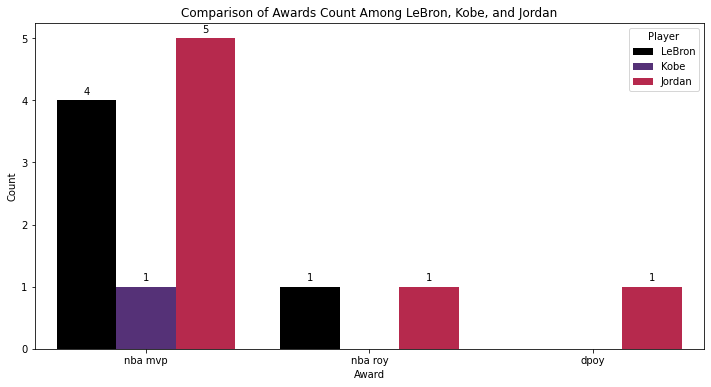

In [0]:
# Combine DataFrames by adding a player column
lebron_awards_count = lebron_awards_count.withColumn("player", lit("LeBron"))
kobe_awards_count = kobe_awards_count.withColumn("player", lit("Kobe"))
jordan_awards_count = jordan_awards_count.withColumn("player", lit("Jordan"))

# Union the three DataFrames
combined_awards_count = lebron_awards_count.union(kobe_awards_count).union(jordan_awards_count)

# Show the combined result
combined_awards_count.show()

# Convert PySpark DataFrame to Pandas DataFrame
combined_awards_count_pd = combined_awards_count.toPandas()

# Create a color palette for specific players
palette = {
    "LeBron": "#000000",    # Black
    "Jordan": "#CE1141",    # Red
    "Kobe": "#552583"       # Purple
}

# Create visualization using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=combined_awards_count_pd, x="award", y="count", hue="player", palette=palette)
plt.title("Comparison of Awards Count Among LeBron, Kobe, and Jordan")
plt.xlabel("Award")
plt.ylabel("Count")
plt.legend(title="Player")

# Add annotation for each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Display the plot
plt.show()

<h3>Awards Comparisson Lebron, Kobe, Jordan<h3>

+-------+-----+------+
|  award|count|player|
+-------+-----+------+
|nba mvp|    4|LeBron|
|nba roy|    1|LeBron|
|nba mvp|    1|  Kobe|
|nba mvp|    5|Jordan|
|nba roy|    1|Jordan|
|   dpoy|    1|Jordan|
+-------+-----+------+



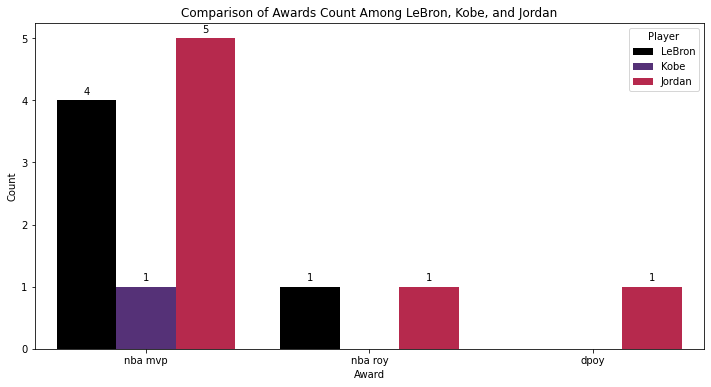

In [0]:
# Combine DataFrames by adding a player column
lebron_awards_count = lebron_awards_count.withColumn("player", lit("LeBron"))
kobe_awards_count = kobe_awards_count.withColumn("player", lit("Kobe"))
jordan_awards_count = jordan_awards_count.withColumn("player", lit("Jordan"))

# Union the three DataFrames
combined_awards_count = lebron_awards_count.union(kobe_awards_count).union(jordan_awards_count)

# Show the combined result
combined_awards_count.show()

# Convert PySpark DataFrame to Pandas DataFrame
combined_awards_count_pd = combined_awards_count.toPandas()

# Create a color palette for specific players
palette = {
    "LeBron": "#000000",    # Black
    "Jordan": "#CE1141",    # Red
    "Kobe": "#552583"       # Purple
}

# Create visualization using Seaborn
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=combined_awards_count_pd, x="award", y="count", hue="player", palette=palette)

# Add annotation
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),  # Format as integer
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title("Comparison of Awards Count Among LeBron, Kobe, and Jordan")
plt.xlabel("Award")
plt.ylabel("Count")
plt.legend(title="Player")
plt.show()

<h3>All Star Selection Comparisson Lebron, Kobe, Jordan<h3>

           player  all_star_selections
0    LeBron James                   20
1     Kobe Bryant                   18
2  Michael Jordan                   14


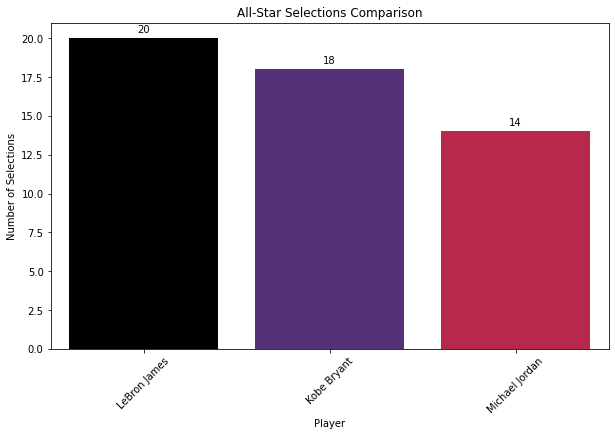

In [0]:
# Data for visualization
data = {
    "player": ["LeBron James", "Kobe Bryant", "Michael Jordan"],
    "all_star_selections": [
        lebron_all_star_selection,
        kobe_all_star_selection,
        jordan_all_star_selection
    ]
}

# Create a Pandas DataFrame
all_star_selections_df = pd.DataFrame(data)

# Display the DataFrame (optional, for checking the data)
print(all_star_selections_df)

# Create visualization using Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=all_star_selections_df, x="player", y="all_star_selections", palette={"LeBron James": "#000000", "Kobe Bryant": "#552583", "Michael Jordan": "#CE1141"})

# Add annotation
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),  # Format as integer
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title("All-Star Selections Comparison")
plt.xlabel("Player")
plt.ylabel("Number of Selections")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<h3>Team End of Season Selection Comparisson Lebron, Kobe, Jordan<h3>

           type number_tm  count          player
0   All-Defense       2nd      1    LeBron James
1       All-NBA       3rd      4    LeBron James
2   All-Defense       1st      5    LeBron James
3    All-Rookie       1st      1    LeBron James
4       All-NBA       1st     13    LeBron James
5       All-NBA       2nd      3    LeBron James
6   All-Defense       2nd      3     Kobe Bryant
7       All-NBA       3rd      2     Kobe Bryant
8   All-Defense       1st      9     Kobe Bryant
9    All-Rookie       2nd      1     Kobe Bryant
10      All-NBA       1st     11     Kobe Bryant
11      All-NBA       2nd      2     Kobe Bryant
12  All-Defense       1st      9  Michael Jordan
13   All-Rookie       1st      1  Michael Jordan
14      All-NBA       1st     10  Michael Jordan
15      All-NBA       2nd      1  Michael Jordan


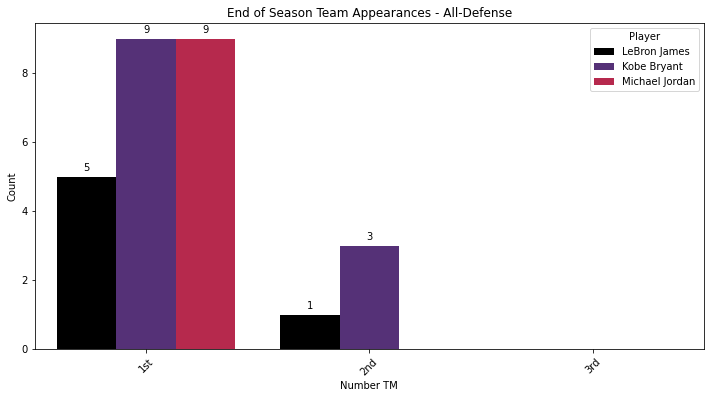

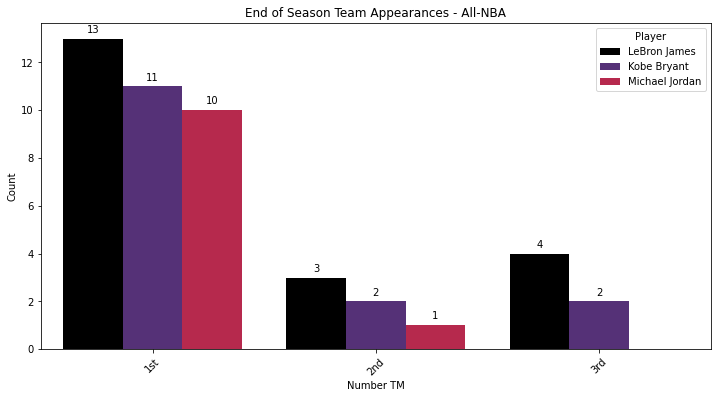

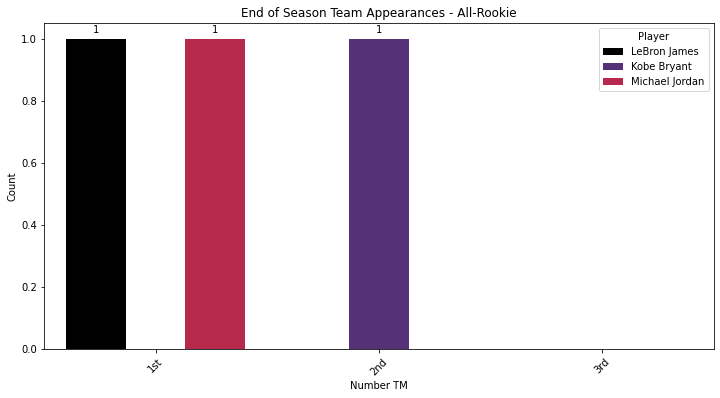

In [0]:
# Add a 'player' column to each DataFrame to identify the player
lebron_end_season_team = lebron_end_season_team.withColumn("player", lit("LeBron James"))
kobe_end_season_team = kobe_end_season_team.withColumn("player", lit("Kobe Bryant"))
jordan_end_season_team = jordan_end_season_team.withColumn("player", lit("Michael Jordan"))

# Union the three DataFrames
combined_end_season_team = lebron_end_season_team.union(kobe_end_season_team).union(jordan_end_season_team)

# Convert PySpark DataFrame to Pandas DataFrame
combined_end_season_team_pd = combined_end_season_team.toPandas()

# Display the Pandas DataFrame (optional, for checking the data)
print(combined_end_season_team_pd)

# Define the desired order for number_tm
number_tm_order = ["1st", "2nd", "3rd"]

# Convert the 'number_tm' column to a categorical type with the specified order
combined_end_season_team_pd['number_tm'] = pd.Categorical(
    combined_end_season_team_pd['number_tm'],
    categories=number_tm_order,
    ordered=True
)

# Create a visualization using Seaborn for 'type' and 'number_tm'
for award_type in combined_end_season_team_pd['type'].unique():
    subset = combined_end_season_team_pd[combined_end_season_team_pd['type'] == award_type]
    
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(data=subset, x="number_tm", y="count", hue="player", palette={"LeBron James": "#000000", "Kobe Bryant": "#552583", "Michael Jordan": "#CE1141"})
    
    # Add annotation
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'),  # Format as integer
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 9), 
                         textcoords = 'offset points')
    
    plt.title(f"End of Season Team Appearances - {award_type}")
    plt.xlabel("Number TM")
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title="Player", loc='upper right')  # Place the legend at the upper right corner
    plt.show()

<h3>Standing Team Comparisson Lebron, Kobe, Jordan<h3>

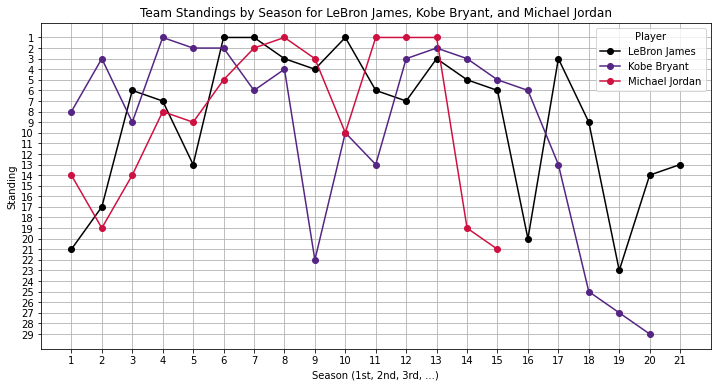

In [0]:
# Add 'player' column to identify the player
lebron_team_standing = lebron_team_standing.withColumn("player", lit("LeBron James"))
kobe_teams_standing = kobe_teams_standing.withColumn("player", lit("Kobe Bryant"))
jordan_teams_standing = jordan_teams_standing.withColumn("player", lit("Michael Jordan"))

# Convert PySpark DataFrame to Pandas DataFrame
lebron_team_standing_pd = lebron_team_standing.toPandas()
kobe_teams_standing_pd = kobe_teams_standing.toPandas()
jordan_teams_standing_pd = jordan_teams_standing.toPandas()

# Add 'season_index' column with sequential numbers
lebron_team_standing_pd['season_index'] = range(1, len(lebron_team_standing_pd) + 1)
kobe_teams_standing_pd['season_index'] = range(1, len(kobe_teams_standing_pd) + 1)
jordan_teams_standing_pd['season_index'] = range(1, len(jordan_teams_standing_pd) + 1)

# Merge LeBron, Kobe, and Jordan DataFrames on 'season_index'
combined_data = pd.merge(
    lebron_team_standing_pd[['season_index', 'standing']].rename(columns={'standing': 'lebron_standing'}),
    kobe_teams_standing_pd[['season_index', 'standing']].rename(columns={'standing': 'kobe_standing'}),
    on='season_index',
    how='outer'
)
combined_data = pd.merge(
    combined_data,
    jordan_teams_standing_pd[['season_index', 'standing']].rename(columns={'standing': 'jordan_standing'}),
    on='season_index',
    how='outer'
)

# Create plot
plt.figure(figsize=(12, 6))

# Create a color palette for specific players
palette = {
    "LeBron James": "#000000",    # Black
    "Kobe Bryant": "#552583",     # Purple
    "Michael Jordan": "#CE1141"   # Red
}

# Plot for LeBron James
plt.plot(combined_data['season_index'], combined_data['lebron_standing'], marker='o', linestyle='-', color=palette["LeBron James"], label='LeBron James')

# Plot for Kobe Bryant
plt.plot(combined_data['season_index'], combined_data['kobe_standing'], marker='o', linestyle='-', color=palette["Kobe Bryant"], label='Kobe Bryant')

# Plot for Michael Jordan
plt.plot(combined_data['season_index'], combined_data['jordan_standing'], marker='o', linestyle='-', color=palette["Michael Jordan"], label='Michael Jordan')

# Invert y-axis to have 1 at the top
plt.gca().invert_yaxis()

# Set title and labels
plt.title("Team Standings by Season for LeBron James, Kobe Bryant, and Michael Jordan")
plt.xlabel("Season (1st, 2nd, 3rd, ...)")
plt.ylabel("Standing")

# Set x-axis ticks as sequential numbers
plt.xticks(ticks=range(1, int(combined_data['season_index'].max()) + 1))

# Set y-axis ticks as 1, 2, 3, ...
plt.yticks(ticks=range(1, int(combined_data[['lebron_standing', 'kobe_standing', 'jordan_standing']].max().max()) + 1))

# Add legend and grid
plt.legend(title="Player", loc='upper right')
plt.grid(True)

# Show plot
plt.show()

<h3>Playoff Percentage Comparisson Lebron, Kobe, Jordan<h3>

+--------------+-------------+---------------+------------------+
|        Player|Total Seasons|Playoff Seasons|Playoff Percentage|
+--------------+-------------+---------------+------------------+
|Michael Jordan|           15|             13|              86.7|
|   Kobe Bryant|           20|             16|              80.0|
|  LeBron James|           21|             15|              71.4|
+--------------+-------------+---------------+------------------+



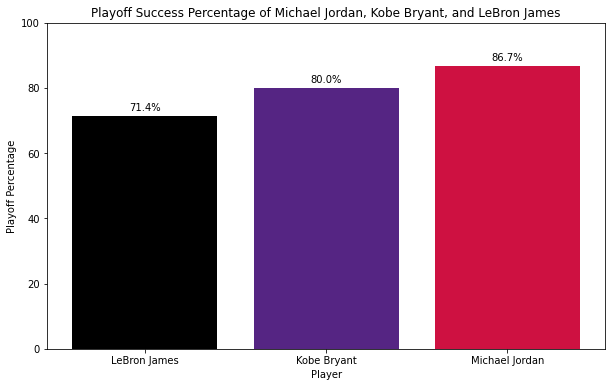

In [0]:
# Function to calculate playoff success percentage
def calculate_playoff_percentage(df, player_name):
    """
    Function to calculate the playoff participation percentage for a given player.
    
    Args:
    df (DataFrame): The DataFrame containing player statistics, including a column indicating playoff seasons.
    player_name (str): The name of the player for whom the playoff percentage is to be calculated.
    
    Returns:
    tuple: A tuple containing the player's name, the total number of seasons, the number of playoff seasons, 
           and the playoff percentage (in percent).
    """
    total_seasons = df.count()
    playoff_seasons = df.filter(df.playoffs == True).count()
    percentage = (playoff_seasons / total_seasons) * 100
    return player_name, total_seasons, playoff_seasons, percentage


# Initialize Spark session
spark = SparkSession.builder.appName("Playoff Success").getOrCreate()

# Calculate playoff success percentage for each player
jordan_percentage = calculate_playoff_percentage(jordan_teams_standing, "Michael Jordan")
kobe_percentage = calculate_playoff_percentage(kobe_teams_standing, "Kobe Bryant")
lebron_percentage = calculate_playoff_percentage(lebron_team_standing, "LeBron James")

# Create a DataFrame to display the results
playoff_percentages = spark.createDataFrame(
    [jordan_percentage, kobe_percentage, lebron_percentage],
    ["Player", "Total Seasons", "Playoff Seasons", "Playoff Percentage"]
)

# Round the playoff percentage to 1 decimal place
playoff_percentages = playoff_percentages.withColumn("Playoff Percentage", round(playoff_percentages["Playoff Percentage"], 1))

# Show the results
playoff_percentages.show()

# Collect data for plotting
data = playoff_percentages.collect()

# Reorder data to LeBron, Kobe, and Jordan
ordered_players = ["LeBron James", "Kobe Bryant", "Michael Jordan"]
ordered_data = sorted(data, key=lambda row: ordered_players.index(row["Player"]))

# Extract reordered players and percentages
players = [row["Player"] for row in ordered_data]
percentages = [row["Playoff Percentage"] for row in ordered_data]

# Define color palette
palette = {"LeBron James": "#000000", "Kobe Bryant": "#552583", "Michael Jordan": "#CE1141"}
colors = [palette[player] for player in players]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(players, percentages, color=colors)
plt.xlabel('Player')
plt.ylabel('Playoff Percentage')
plt.title('Playoff Success Percentage of Michael Jordan, Kobe Bryant, and LeBron James')
plt.ylim(0, 100)  # Set y-axis range from 0 to 100

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage}%', ha='center', va='bottom')

# Show the plot
plt.show()

<h3>Best Stat Each Season Comparisson Lebron, Kobe, Jordan<h3>

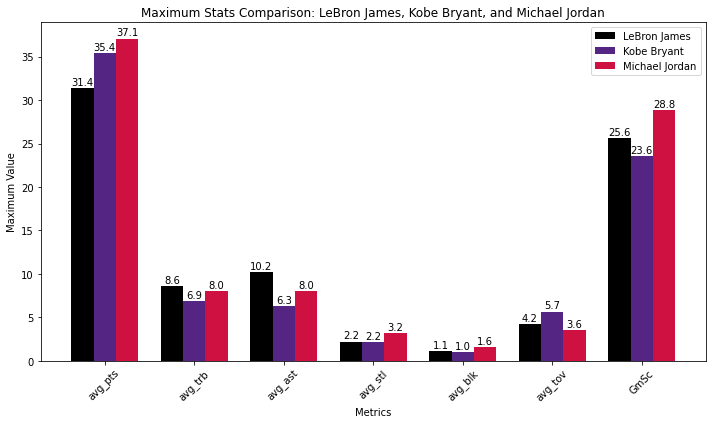

In [0]:
# Define the color palette
palette = {"LeBron James": "#000000", "Kobe Bryant": "#552583", "Michael Jordan": "#CE1141"}

def get_max_stats(df):
    """
    Function to get the maximum values for avg_pts, avg_trb, avg_ast, avg_stl, avg_blk, avg_tov, and GmSc columns.
    
    Args:
    df (DataFrame): The DataFrame containing player statistics.
    
    Returns:
    DataFrame: A DataFrame containing the maximum values for each column.
    """
    return df.agg(
        max("avg_pts").alias("max_avg_pts"),
        max("avg_trb").alias("max_avg_trb"),
        max("avg_ast").alias("max_avg_ast"),
        max("avg_stl").alias("max_avg_stl"),
        max("avg_blk").alias("max_avg_blk"),
        max("avg_tov").alias("max_avg_tov"),
        max("GmSc").alias("max_GmSc")
    ).toPandas()

# Example DataFrames (lebron_stat_each_season, kobe_stat_each_season, jordan_stat_each_season)
# Replace these with your actual DataFrame definitions

# Get maximum statistics for each player
max_lebron_stats = get_max_stats(lebron_stat_each_season)
max_kobe_stats = get_max_stats(kobe_stat_each_season)
max_jordan_stats = get_max_stats(jordan_stat_each_season)

# Convert to DataFrame for plotting
max_stats_df = pd.DataFrame({
    "Metric": ["avg_pts", "avg_trb", "avg_ast", "avg_stl", "avg_blk", "avg_tov", "GmSc"],
    "LeBron James": max_lebron_stats.iloc[0],
    "Kobe Bryant": max_kobe_stats.iloc[0],
    "Michael Jordan": max_jordan_stats.iloc[0]
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
bar_width = 0.25  # width of the bars
x = range(len(max_stats_df["Metric"]))  # x locations for the groups

for i, player in enumerate(palette.keys()):
    bars = ax.bar(
        [p + i * bar_width for p in x], 
        max_stats_df[player], 
        width=bar_width, 
        label=player, 
        color=palette[player]
    )
    # Add text labels
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 0.1,  # adjust the y position of the text to be above the bar
            f'{yval:.1f}',  # format to 1 decimal place
            ha='center', 
            va='bottom'
        )

# Customize the plot
ax.set_xlabel("Metrics")
ax.set_ylabel("Maximum Value")
ax.set_title("Maximum Stats Comparison: LeBron James, Kobe Bryant, and Michael Jordan")
ax.legend()
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(max_stats_df["Metric"])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<h3>Total Stat Comparisson Lebron, Kobe, Jordan<h3>

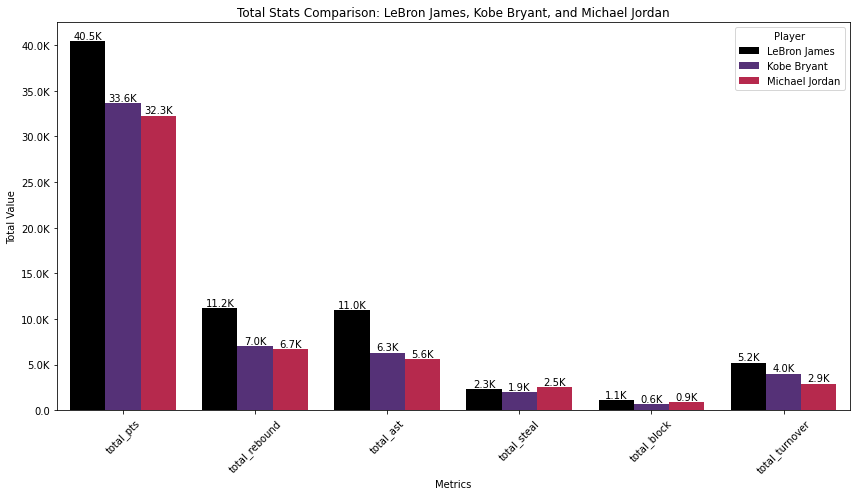

In [0]:
# Define the color palette
palette = {"LeBron James": "#000000", "Kobe Bryant": "#552583", "Michael Jordan": "#CE1141"}

# Assuming you have already created the DataFrames for LeBron, Kobe, and Jordan
# Combine the DataFrames for LeBron, Kobe, and Jordan
lebron_total_stat = lebron_total_stat.withColumn("player_name", lit("LeBron James"))
kobe_total_stat = kobe_total_stat.withColumn("player_name", lit("Kobe Bryant"))
jordan_total_stat = jordan_total_stat.withColumn("player_name", lit("Michael Jordan"))

# Union all DataFrames
combined_stats = lebron_total_stat.union(kobe_total_stat).union(jordan_total_stat)

# Convert to Pandas DataFrame for plotting
combined_stats_pd = combined_stats.toPandas()

# Reshape the DataFrame to have metrics in rows
combined_stats_melted = combined_stats_pd.melt(id_vars=["player_name"], 
                                                value_vars=["total_pts", "total_rebound", "total_ast", "total_steal", "total_block", "total_turnover"],
                                                var_name="Metric",
                                                value_name="Value")

# Define a function to format the numbers with 1 decimal place
def format_func(value, tick_number):
    if value >= 1000:
        return f'{value/1000:.1f}K'
    return f'{value:.1f}'

# Plotting
plt.figure(figsize=(12, 7))

# Plot each metric
sns.barplot(data=combined_stats_melted, x="Metric", y="Value", hue="player_name", palette=palette)

# Add text labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2., height + 0.5, 
        f'{height/1000:.1f}K',  # Format label as K with 1 decimal place
        ha='center', va='bottom'
    )

# Customize the plot
plt.xlabel("Metrics")
plt.ylabel("Total Value")
plt.title("Total Stats Comparison: LeBron James, Kobe Bryant, and Michael Jordan")
plt.legend(title='Player')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))  # Apply the formatter to the y-axis
plt.tight_layout()

# Show the plot
plt.show()

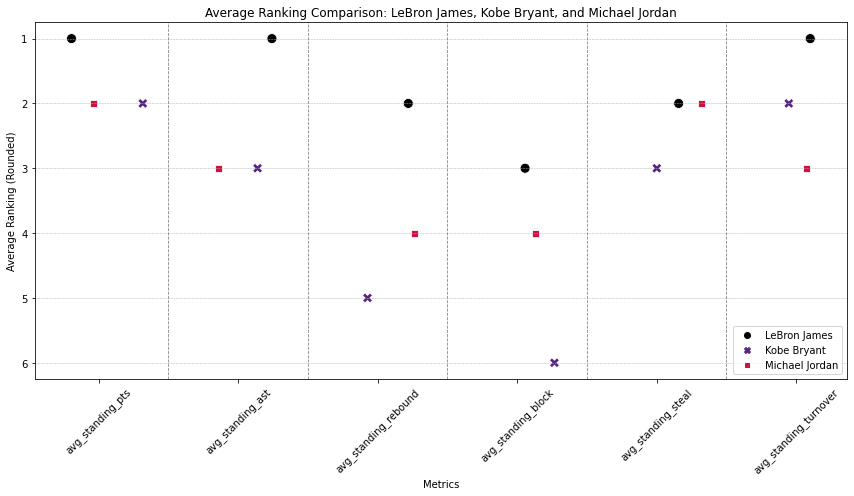

In [0]:
# Define the color palette
palette = {"LeBron James": "#000000", "Kobe Bryant": "#552583", "Michael Jordan": "#CE1141"}

# Define the average rankings function
def average_rankings(df, player_name):
    """
    Function to calculate the average ranking for each statistic column in the given DataFrame,
    and round the results to the nearest integer.

    Args:
    df (DataFrame): The DataFrame containing player rankings.
    player_name (str): The name of the player to be used for identification in the output.

    Returns:
    DataFrame: A DataFrame containing the rounded average rankings for each statistic.
    """
    avg_rankings = df.agg(
        avg("standing_pts").alias("avg_standing_pts"),
        avg("standing_ast").alias("avg_standing_ast"),
        avg("standing_rebound").alias("avg_standing_rebound"),
        avg("standing_block").alias("avg_standing_block"),
        avg("standing_steal").alias("avg_standing_steal"),
        avg("standing_turnover").alias("avg_standing_turnover")
    )
    
    avg_rankings_pd = avg_rankings.toPandas()
    
    # Round the results to the nearest integer
    avg_rankings_pd = avg_rankings_pd.round().astype(int)
    
    avg_rankings_pd["Player"] = player_name
    return avg_rankings_pd

# Example usage for LeBron James, Kobe Bryant, and Michael Jordan
# Assume `lebron_rank_each_season`, `kobe_rank_each_season`, `jordan_rank_each_season` are your DataFrames

# Calculate average rankings for LeBron James
avg_lebron_pd = average_rankings(lebron_rank_each_season, "LeBron James")

# Calculate average rankings for Kobe Bryant
avg_kobe_pd = average_rankings(kobe_rank_each_season, "Kobe Bryant")

# Calculate average rankings for Michael Jordan
avg_jordan_pd = average_rankings(jordan_rank_each_season, "Michael Jordan")

# Combine all DataFrames into a single DataFrame
combined_avg_df = pd.concat([avg_lebron_pd, avg_kobe_pd, avg_jordan_pd], ignore_index=True)

# Melt the DataFrame for dot plot
combined_avg_df_melted = combined_avg_df.melt(id_vars="Player", var_name="Metric", value_name="Average_Ranking")

# Define a consistent offset for jitter
metrics = combined_avg_df_melted["Metric"].unique()
metric_positions = {metric: idx for idx, metric in enumerate(metrics)}
offset = 0.35

# Add consistent offset based on the metric
def apply_jitter(row):
    base_position = metric_positions[row['Metric']]
    return base_position + (np.random.uniform(-offset, offset) if row['Player'] == row['Player'] else 0)

combined_avg_df_melted['Metric_Jittered'] = combined_avg_df_melted.apply(apply_jitter, axis=1)

# Plotting
plt.figure(figsize=(12, 7))

# Plot each player's average rankings with jitter
sns.scatterplot(data=combined_avg_df_melted, x="Metric_Jittered", y="Average_Ranking", hue="Player", palette=palette, style="Player", s=100)

# Customize the plot
plt.xlabel('Metrics')
plt.ylabel('Average Ranking (Rounded)')
plt.title('Average Ranking Comparison: LeBron James, Kobe Bryant, and Michael Jordan')
plt.gca().invert_yaxis()  # Lower ranks should be at the top

# Add vertical dashed lines to separate each metric
for i in range(len(metrics) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.8)

# Add horizontal grid lines
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Set x-axis labels to be centered on each metric
plt.xticks(ticks=np.arange(len(metrics)), labels=metrics, rotation=45)

# Remove text labels from dots
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()